# Effects of temperature on microbial diversity and carbon use efficiency

Danica Duan  
Emma Cavan, Tom Clegg, Samraat Pawar

# Method

## Biomass and resource dynamics model

The core model used in this study was first adapted by Tom Clegg and Dr. Emma Cavan from Consumer-Resource Models in [MacArthur (1970)](https://www.sciencedirect.com/science/article/pii/0040580970900390) and [Marsland et al. (2019)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006793), then further adapted into the current version, considering the concentration dynamics of N species of heterotrophic mesophilic bacteria consumers competing for M types of resources.

The consumer (C) biomass concentration (g/mL) dynamic is modelled by calculating the carbon resource requirement for exponential growth: the gain of carbon through resource uptake, minus the loss of carbon through inefficiency during uptake and the transformation of compound (metabolic secretion and maintenance respiration). 
The resource (S) concentration (g/mL) dynamic is modelled by calculating carbon inflow minus outflow. The inflow of each resource includes a contant abiotic external supply, the leakage during consumers' uptake, and the metabolic by-products biochemically transformed from other resources; the outflow is the total uptake of the resource by all consumers. 


The biomass concentration dynamic of species i: 
\begin{equation}
dC_i/dt = C_i\Bigl(\sum_{j=1}^{M}U_{ij}S_j(1-\sum_{k=1}^{M}l_{jk}) - R_i\Bigl)
\end{equation}

The resource concentration dynamic of resource j:
\begin{equation}
dS_j/dt = \rho_j - \sum_{i=1}^{N}\Bigl(C_iU_{ij}S_j-\sum_{k=1}^{M}C_iU_{ik}S_kl_{kj}\Bigl)
\end{equation}

(Type 2: Monod equation
\begin{equation}
Mo = \frac{S_j}{K_j + S_j}
\end{equation})




| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $M$ | Number of resources | - | User defined |
| $N$ | Number of species | - | User defined |
| $C_i$ | Bacteria population of species i | g/mL | 0.1 |
| $S_j$ | Concentration of resource j | g/mL | 0.1 |
| $K_j$ | Half saturation constant | g/mL | 0.5? (Dependant on temperature, species & resources?) |
| $U_{ij}$ | Uptake of resource j by species i | 1/time | Temperature & size dependant |
| $R_i$ | Respiration of species i | g/mL | Temperature & size dependant |
| $l_{jk}$ | Leakage: proportion of resource j converted to resource k | - | $l_j$ = 0.4|
| $\rho_j$ | Supply of resource j | g/mL | 1 |

In these equations above, we are only considering a Type I functional response, assuming a linear relationship between resource consumption and growth rate. $U_{ij}$ is the uptake preference of the M resources by species i. On species level, uptake $U_i$ follows the temperature and size dependencies and is randomly assigned across M resources. $l_{jk}$ follows the leakage-transformation matrix with total leakage summing up to 0.4 for each resource ($l_j = 0.4$), when $j = k$, $l_{jk}$ value is the leakage fraction resulting from the inefficiency of the resource uptake; when $j < k$, $l_{jk}$ value is the biochemical transformation of resource j into k; when $j > k$, $l_{jk}$ values are 0, for I am considering the reactions to be irriversible following the second law of thermodynamics. $R_i$ is the carbon loss of species i through maintenance respiration. $\rho_j$ is the concentration of abiotic external supply for resource j. 

### Vectorized model
\begin{equation}
dC/dt = C \odot ((1-l)U \cdot S - R)
\end{equation}

\begin{equation}
dS/dt = \rho - C \cdot (US)+ C \cdot ((US) \cdot L)
\end{equation}

$l$ is the set value of the total leakage of each resource, L is the leakage-transformation matrix. 

## Temperature and size dependencies

The uptake and respiration rates in the model are considered size and temperature dependent following the Metabolic Theory of Ecology and a modified version of the Schoolfield equation ([Kontopoulos et al., 2020](https://onlinelibrary.wiley.com/doi/full/10.1111/evo.13946)), assuming both metabolic rates are controlled by single enzymes whose reaction rates are deteremined by temperature, and deactivate outside operational temperature range. 

Temperature and size dependencies for resource uptake (U) and maintenance respiration (R): 

\begin{equation}
U_{ij} = \frac{B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_U}{E_{D_U}-Ea_U}e^{\frac{E_{D_U}}{k}\cdot(\frac{1}{T_{pk_U}}-\frac{1}{T_{ref}})}}
\end{equation}

\begin{equation}
R_i = \frac{B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_R}{E_{D_R}-Ea_R}e^{\frac{E_{D_R}}{k}\cdot(\frac{1}{T_{pk_R}}-\frac{1}{T_{ref}})}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $B$ | Normalisation constant | - | Experimental observation |
| $m$ | Mass | g | 1 |
| $Ea$ | Activation energy | eV | Experimental observation |
| $k$ | Boltsmann constant | eV/K | $8.62$ $\times 10^{-5}$ |
| T | Temperature | K | User defined |
| $T_{ref}$| Reference temperature | K | 273.15 |
| $E_D$ | High temperature deactivation energy | eV | 3.5|
| $T_{pk_U}$ | Temperature of peak uptake rate | K | Experimental observation |
| $T_{pk_R}$ | Temperature of peak respiration rate | K | $T_{pk_U}$ + 3|

Note that the parameters values for these equations are given according to [Smith et al. (2019)](https://www.nature.com/articles/s41467-019-13109-1), assuming that resource uptake follows a similar temperature dependency curve with bacterial growth rate. All temperature terms are in the unit of Kelvin(K). 

In these equations, the metabolic rates are normalized to biomass specific for each consumer with $B = B_0 m^{(-\frac{1}{4})}$ where m is the biomass of the organism, and are all given a value of 1 g in this model since we are not discussing the size effects during assembly. k is the Boltsmann constant, $8.617 \times 10^{−5} eV K^{−1}$. T is the model temperature and $T_{ref}$ is the reference temperature. $T_{pk}$ is the temperature for highest metabolic rates and also is the deactivation temperature for related enzyme, $T_{pk}$ for uptake is sampled from a normal distribution with mean value at 308.15 K, and 3 degrees higher for respiration. $E_a$ values are the activation energies, sampled from beta distributions with median values of 0.82 ev and 0.67 ev for uptake and respiration. $E_D$ values are the deactivation energies, set to 3.5 eV for all reactions. $U_0$ and $R_0$ are the uptake and respiration rates at reference temperatures.


## ?

### 1 consumer + 1 resource: 

$dS_j/dt = 0$: 
\begin{equation}
\rho_j - C_iU_{ij}S_j(1-l_j) = 0
\end{equation}

\begin{equation}
S_j = \frac{\rho_j}{C_iU_{ij}(1-l_j)}
\end{equation}

$dC_i/dt = 0$:
\begin{equation}
U_{ij}S_j(1-l_j) - R_i = 0
\end{equation}

\begin{equation}\label{eq:}
C_i = \frac{\rho_j}{R_i}
\end{equation}


### 2 consumers + 1 resource:

$dS_i/dt = 0$:
\begin{equation}
\rho_j - (C_\alpha U_{\alpha j}+ C_\beta U_{\beta j})S_j(1-l_j) = 0
\end{equation}

\begin{equation}
S_j = \frac{\rho_j}{(C_\alpha U_{\alpha j}+ C_\beta U_{\beta j})(1-l_j)}
\end{equation}

$dC_\alpha/dt = 0$: 
\begin{equation}
U_{\alpha j}S_j(1-l_j) - R_\alpha = 0
\end{equation}

\begin{equation}
\frac{\rho_jU_{\alpha j}}{C_\alpha U_{\alpha j}+ C_\beta U_{\beta j}} - R_\alpha = 0
\end{equation}

At $T = T_{ref}$, $U_{\alpha j} = U_{\beta j} = U_0$, $R_\alpha = R_\beta = R_0$: 

\begin{equation}
C_\alpha + C_\beta = \frac{\rho_j}{R_0}
\end{equation}

## Assembly simulation

The simulation for community assemblies is run on Python. 

For each assembly, I start the system with a random pool of 100 species competing for 50 resources, then run the selection process by integrating the concentration dynamics differential equation of species and resources (equation 1 and 2). The running time is set to 4000 for all systems to reach steady state ($dC_i/dt = 0$ and $dS_j/dt = 0$), with a constant flux of externally supply of resource at each time point ($\rho_j = 1$). The initial biomass concentration for each species is 0.1 g/mL and the initial resource concentration for each resource is 1 g/mL. 

Cross-feeding is modelled through the leakage-transformation matrix. Reference temperature for the temperature dependences of both metabolic traits are set to 0 &deg;C. 

For each invation event of the community, all extinct species (with biomass < 0.01 g/mL) are replaced with randomly generated new species, then the system is run to reach a new equilibrium. The invation events are performed for a set number of times inside one assembly. 

## Calculation for CUE
##### Literature notes

| Mathmetical approach | Notes | ref |
|---|---|---|
| $\frac{U-R}{U}$| Uptake and Respiration | [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[9](https://www.sciencedirect.com/science/article/pii/S0038071711002112)|
|$\frac{GR}{GR+RR}$| Growth rate and respiration rate |[1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[6](https://academic.oup.com/femsec/article/73/3/430/528718) |
|  |
| $\frac{\Delta C_S-R_{cum}}{\Delta C_S}$ | Decrease in substrate concentration and culmulative respiration| [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[8](https://www.sciencedirect.com/science/article/pii/S0038071711001787)|
| $\frac{\Delta C_B}{\Delta C_B+R_{cum}}$ | Increase in biomass and culmulative respiration| [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[2](https://www.sciencedirect.com/science/article/pii/S0038071716300165),[3](http://www.soest.hawaii.edu/oceanography/courses/OCN626/BGE_annrev.pdf),[4](https://www.sciencedirect.com/science/article/pii/S0038071716000316),[5](https://onlinelibrary.wiley.com/doi/abs/10.1111/gcb.12036),[7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)|


Microbial growth: rates of biomass increase, protein synthesis, DNA replication, or consumption of $^{13}C$‐labeled substrates. [7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)

Respiration: rates of total $CO_2$ efflux, $^{13}CO_2$ efflux from labeled substrates, oxygen consumption, or respiratory electron transport. [7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)

$ U = G + R $ [3](http://www.soest.hawaii.edu/oceanography/courses/OCN626/BGE_annrev.pdf),[4](https://www.sciencedirect.com/science/article/pii/S0038071716000316); metabolic tracer [9](https://www.sciencedirect.com/science/article/pii/S0038071711002112)


CUE estimation under steady state conditions, the efficiency of microbial metabolism(maintenance): $\frac{R}{U}$ [10](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0093282)

Population, community and ecosystem-scale CUE ([Fig.2](https://link.springer.com/article/10.1007/s10533-016-0191-y/figures/2)) [11](https://link.springer.com/article/10.1007/s10533-016-0191-y)

##### Calculation

We consider CUE as an intrinsic value for each species, encoded in the species' preference for uptake, leakage and transformation ability of carbon source, and maintenance respiration required for survival. These CUE values are then selected during assembly. 

The intrinsic CUE value of species i is calculated with a common CUE calculation method using $\frac{\text{Carbon Gain} - \text {Carbon Loss}}{\text{Carbon Gain}}$ [(Manzoni et al. 2012)](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x):
\begin{equation}
CUE_i = \frac{\sum\limits _{j=1}^{M}U_{ij}S_0(1-\sum\limits_{k=1}^{M}l_{jk}) - R_i}{\sum\limits _{j=1}^{M}U_{ij}S_0}
\end{equation}

$S_0$ here is the initial resource concentration at the beginning of the assembly, which is 1 g/mL. 

According to [Smith et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.09.14.296095v1), the temperature response of CUE for organisms within the operational temperature range (OTR) has the form of the Boltzmann-Arrhenius equation. Here I give a similar calculation process of the intrinsic CUE based on equation(5), assuming the exponential increase of metabolic rates with temperature is equivalent to the Boltzmann-Arrhenius equation.

\begin{equation}
CUE = \frac{U_0e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)} (1-l) - R_0e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}{U_0e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

The species CUE value at reference temperature ($T = T_{ref}$):
\begin{equation}
CUE_0 = \frac{U_0(1 - l) - R_0}{U_0}
\end{equation}

If we take a log form of equation(6), and assign $\Delta T = \frac{1}{k}\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl) \rightarrow 0$, then we can calculate the approximation of CUE as the first-order Taylor expression: 

\begin{equation}
lnCUE = ln(U(1-l) - R) - lnU \approx ln(U_0(1-l) - R_0) - lnU_0 + \bigl(\frac{R_0E_R - R_0E_U}{U_0(1-l)-R_0}\bigl)\Delta T
\end{equation}

Which equation has the form of an Arrhenius equation, so if we take $CUE_0$ out of the equation, we can see the activation energy of CUE as: 

\begin{equation}
Ea_{CUE} = \frac{R_0(E_U - E_R)}{U_0(1-l) - R_0}
\end{equation}


## Simulation

- Extincted species are detected and replaced (concentration < 0.01 g/mL).
- Steady state is reached when no concentration change within 50 time steps. 


### Example uptake and leakage matrix at 25 C (10 consumers, 5 resources)

- Uptake: assuming each consumer has one single temperature response curve which controls the total uptake of all resources. The resources uptake by each consumer are averagely and randomly distributed, which sum up to the total value calculated by the size and temperature dependency function.
- leakage(the conversion of resource j to k): the total conversion effecient of each resource is 0.4, which is averagely distributed among all resources it converted to. Assuming no resources can be converted back, so the lower diagnol is set to be 0. 

In [195]:
import parameters as par
import size_temp_funcs as st
import numpy as np

N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U =  273.15 + np.random.normal(35, 5, size = N)
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
k = 0.0000862 # Boltzman constant
T_pk = Tref + pk_U # Peak above Tref, Kelvin
T = 273.15 + 25 # Temperature
Ea_U = np.random.beta(4, ((4 - 1/3) / 0.82) + 2/3 - 4, N) # Ea for uptake
B_U = 2 * np.exp((-0.82/k) * ((1/Tref)-(1/273.15)))/(1 + (0.82/(Ea_D - 0.82)) * np.exp(Ea_D/k * (1/308.15 - 1/Tref))) # B0 for uptake

U_sum = st.temp_growth(k, T, Tref, T_pk, N, B_U, Ma, Ea_U, Ea_D)
np.random.seed(0)
diri = np.transpose(np.random.dirichlet(np.ones(M),N))
U = np.transpose(diri*U_sum)
print(U_sum)
print(U)

[62.21704758 54.62086892 31.98733081 51.39120986 55.27514236 41.94982152
 11.09489086 26.72383949 13.72655697 33.65478608]
[[11.48012288 18.11622227 13.31706827 11.35501372  7.94862045]
 [ 7.42630474  4.11688358 15.90562255 23.71268858  3.45936947]
 [ 8.60368483  4.12759689  4.60337397 14.24859128  0.40408384]
 [ 0.86037225  0.19277545 16.87020003 14.21150002 19.25636212]
 [27.56102988 11.50572251  4.43624166 10.8699303   0.90221802]
 [ 8.01816723  1.21461694 22.72099344  5.79189134  4.20415257]
 [ 1.04452347  5.05895381  2.07042486  2.85650976  0.06447896]
 [ 3.72832182  3.67253839  3.72121345 11.16081383  4.440952  ]
 [ 1.81080761  2.335184    4.86157397  0.2524673   4.46652409]
 [16.1392849   3.43257349  2.0058432   5.50710361  6.56998087]]


[39.47619382 67.43534285 63.75125379 44.29699437 55.04015437]
[[1.24156944e+01 1.85591018e+01 8.24680325e+00 8.09536147e-02
  1.73640786e-01]
 [7.80928825e+00 9.48717587e-01 5.71924195e-01 3.67342012e+01
  2.13712116e+01]
 [2.97059809e+00 1.19690798e-02 5.11880458e+01 5.87575726e+00
  3.70488356e+00]
 [8.25398831e+00 8.09234527e-01 2.15749531e+00 2.59164448e+01
  7.15983137e+00]
 [6.41892598e+00 4.42861295e+00 1.30008592e+01 1.32621020e+00
  2.98655460e+01]]


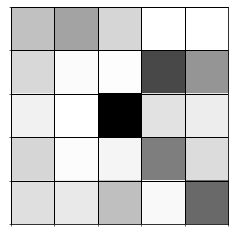

In [232]:
import parameters as par
import size_temp_funcs as st
import numpy as np

N = 5 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk_U =  273.15 + np.random.normal(35, 5, size = N)
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
k = 0.0000862 # Boltzman constant
T_pk = Tref + pk_U # Peak above Tref, Kelvin
T = 273.15 + 25 # Temperature
Ea_U = np.random.beta(4, ((4 - 1/3) / 0.82) + 2/3 - 4, N) # Ea for uptake
B_U = 2 * np.exp((-0.82/k) * ((1/Tref)-(1/273.15)))/(1 + (0.82/(Ea_D - 0.82)) * np.exp(Ea_D/k * (1/308.15 - 1/Tref))) # B0 for uptake

U_sum = st.temp_growth(k, T, Tref, T_pk, N, B_U, Ma, Ea_U, Ea_D)
diri = np.transpose(np.random.dirichlet(np.ones(M),N))
U = np.transpose(diri*U_sum)
print(U_sum)
print(U)

Xlabel = ''
Ylabel = ''
fig = plt.figure()
ax = fig.add_subplot(111)
im = plt.imshow(U, cmap = 'binary')
ax = plt.gca()
ax.set_xticks(np.arange(-.5,5,1), minor = True)
ax.set_yticks(np.arange(-.5,5,1), minor = True)
plt.xticks([])
plt.yticks([])
ax.grid(which = 'minor', color = 'k', linestyle='-', linewidth=1)
plt.title( "" )
plt.show()


In [234]:
B_U

array([1.99999997, 1.99999997, 1.99999997, 1.99999997, 1.99999997])

In [235]:
Ea_U

array([0.83751212, 0.98787464, 0.97209896, 0.86986608, 0.93084159])

In [236]:
pk_U

array([316.62730916, 307.73197786, 302.72172574, 301.80741505,
       304.27636416])

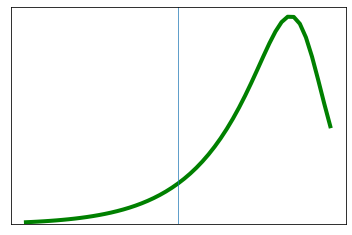

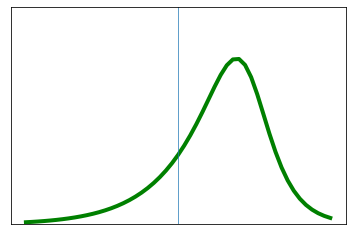

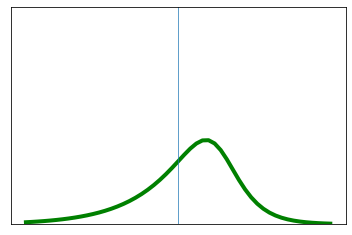

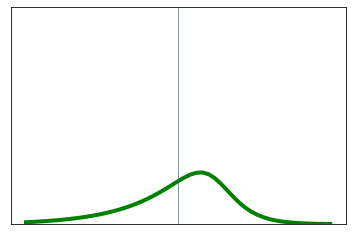

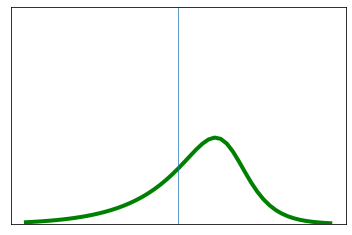

In [280]:
T = 273.15 + np.linspace(0,50,51) # Temperatures
for i in range(N):
    U_Sharpe = B_U[i] * np.exp((-Ea_U[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U[i]/(Ea_D[i] - Ea_U[i])) * np.exp(Ea_D[i]/k * (1/pk_U[i] - 1/T))) 
    plt.plot(T - 273.15, U_Sharpe, 'g-', linewidth=4)
    plt.axvline(25, linewidth = 0.7)
    plt.yticks([])
    plt.ylim(0,210)
    plt.xticks([])
    plt.show()

In [216]:
import numpy as np

M = 5
lf = 0.4
l_raw = np.array([[np.random.normal(1/(i-1),0.005)* lf if i-1>0 else np.random.normal(lf, 0.005) for i in range(M,0,-1)] for i in range(1,M+1)])
fix = [[1 if j>i else 0 for j in range(M)] for i in range(M)]
fix[M-1][0] = 1
l = np.transpose(l_raw) * fix
print(np.round(l, 3))
print(np.sum(l, axis = 1))


[[0.    0.099 0.102 0.101 0.103]
 [0.    0.    0.134 0.135 0.134]
 [0.    0.    0.    0.199 0.199]
 [0.    0.    0.    0.    0.4  ]
 [0.405 0.    0.    0.    0.   ]]
[0.40385215 0.40359631 0.39863688 0.40010074 0.40456853]


#### Revised version of leakage matrix

[[0.081 0.082 0.08  0.08  0.075]
 [0.    0.098 0.099 0.102 0.098]
 [0.    0.    0.135 0.132 0.133]
 [0.    0.    0.    0.199 0.197]
 [0.    0.    0.    0.    0.398]]
[0.39731151 0.39676734 0.40017088 0.39579384 0.39793471]


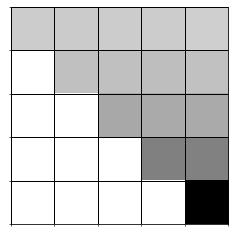

In [233]:
import numpy as np

M = 5
lf = 0.4

l_raw = np.array([[np.random.normal(1/(i),0.005)* lf for i in range(M,0,-1)] for i in range(1,M+1)])
l = [[l_raw[j,i] if j>=i else 0 for j in range(M)] for i in range(M)]

print(np.round(l, 3))
print(np.sum(l, axis = 1))



im = plt.imshow(l, cmap = 'binary')
ax = plt.gca()
ax.set_xticks(np.arange(-.5,5,1), minor = True)
ax.set_yticks(np.arange(-.5,5,1), minor = True)
plt.xticks([])
plt.yticks([])
ax.grid(which = 'minor', color = 'k', linestyle='-', linewidth=1)
plt.title( "" )
plt.grid()
plt.show()

### Example of Modified Sharpe-Schoolfield Temperature dependency

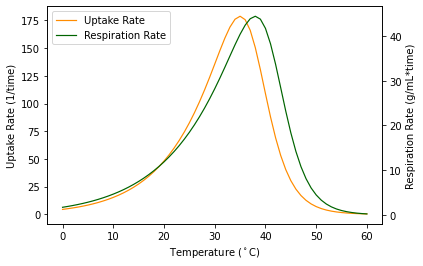

178.75784811786508


In [36]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.0000862 # Boltzman constant
Tref = 273.15 + 0 # Reference temperature Kelvin, 0 degrees C
lf = 0.4
T = 273.15 + np.linspace(0,60,61) # Temperatures
T_pk_U = 273.15 + 35
T_pk_R = T_pk_U + 3

Ea_D = 3.5 # Deactivation energy
Ea_CUE = 0.3
B0_CUE = 0.1 * np.exp((-Ea_CUE/k) * ((1/Tref)-(1/273.15)))
B_U = 4.47
B_R = 1.70
Ea_U = 0.82 # Ea for uptake
Ea_R = 0.67

U_Sharpe = B_U * np.exp((-Ea_U/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U/(Ea_D - Ea_U)) * np.exp(Ea_D/k * (1/T_pk_U - 1/T))) 
R_Sharpe = B_R * np.exp((-Ea_R/k) * ((1/T)-(1/Tref)))/(1 + (Ea_R/(Ea_D - Ea_R)) * np.exp(Ea_D/k * (1/T_pk_R - 1/T)))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(T - 273.15, U_Sharpe, 'darkorange', linewidth=1.2, label = "Uptake Rate")
ln2 = ax2.plot(T - 273.15, R_Sharpe, 'darkgreen', linewidth=1.2, label = "Respiration Rate")
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake Rate (1/time)')
ax2.set_ylabel('Respiration Rate (g/mL*time)')
# plt.title('Modified Sharpe-Schoolfield Temperature Performance Curve')
lns = ln1+ln2
ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
plt.show()

print(np.max(U_Sharpe))

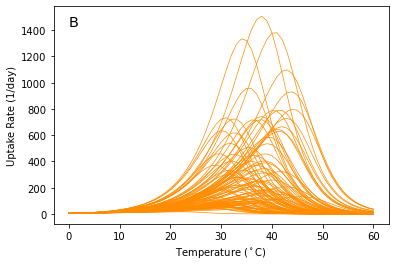

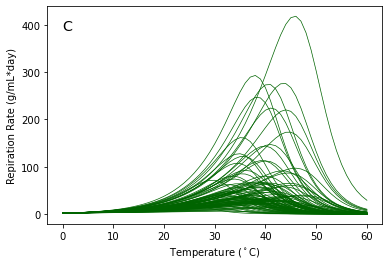

In [21]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
k = 0.0000862 # Boltzman constant
Tref = 273.15 + 0 # Reference temperature Kelvin, 0 degrees C
T = 273.15 + np.linspace(0,60,61) # Temperatures
Ea_D = 3.5

B_U = 4.47
# CUE_0 = np.random.uniform(0.18, 0.26, N) # mean = 0.2203849, SE = 0.04119449, N = 26
B_R = 1.7

np.random.seed(11) # 11 19 20
T_pk_U = 273.15 + np.random.normal(35, 5, size = N)
T_pk_R = T_pk_U + 3
a = 15
Ea_U = np.random.beta(a, ((a - 1/3) / (0.82/4)) + 2/3 - a, N)*4
Ea_R = np.random.beta(a, ((a - 1/3) / (0.67/4)) + 2/3 - a, N)*4

for i in range(N):
    U_Sharpe = B_U * np.exp((-Ea_U[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U[i]/(Ea_D - Ea_U[i])) * np.exp(Ea_D/k * (1/T_pk_U[i] - 1/T))) 
    plt.plot(T - 273.15, U_Sharpe, color = 'darkorange', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)') 
plt.ylabel('Uptake Rate (1/day)')
plt.text(0, 1430, "B", size = 'x-large')
plt.show()

for i in range(N):
    R_Sharpe = B_R * np.exp((-Ea_R[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_R[i]/(Ea_D - Ea_R[i])) * np.exp(Ea_D/k * (1/T_pk_R[i] - 1/T))) 
    plt.plot(T - 273.15, R_Sharpe, 'darkgreen', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)') 
plt.ylabel('Repiration Rate (g/mL*day)')
plt.text(0, 390, "C", size = 'x-large')
plt.show()

### Type I


#### 1 consumer, 1 resource, 25C

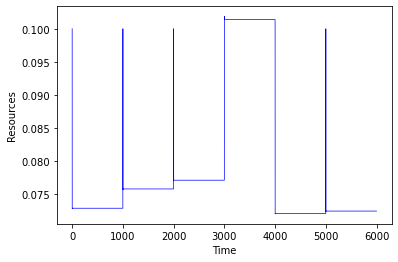

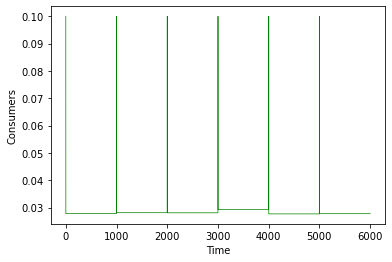

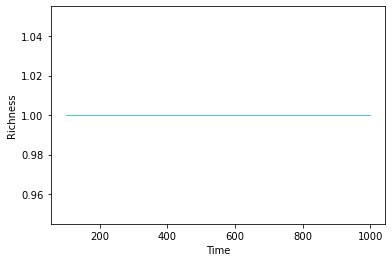

In [1]:
from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 10 # immigration times inside one assembly
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

#### 2 consumers, 1 resources, 25C

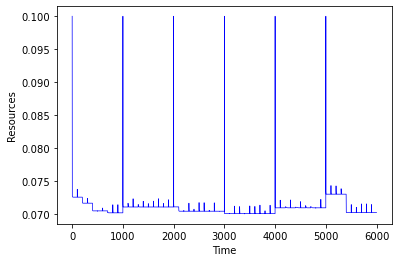

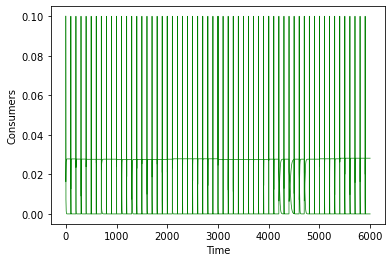

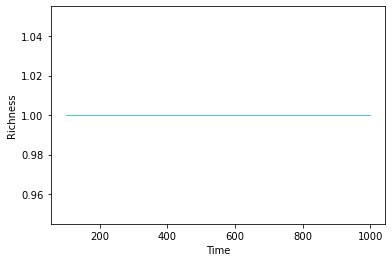

In [4]:
from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 10 # immigration times inside one assembly
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

#### 1 assembly, 1 immigration

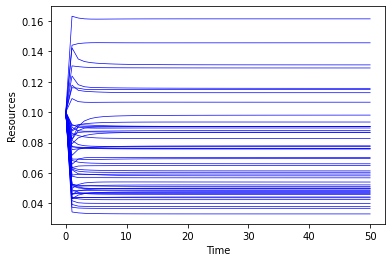

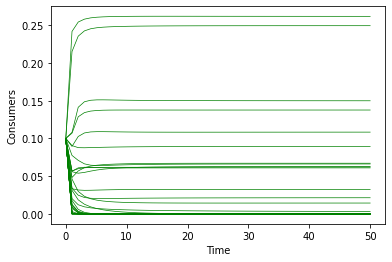

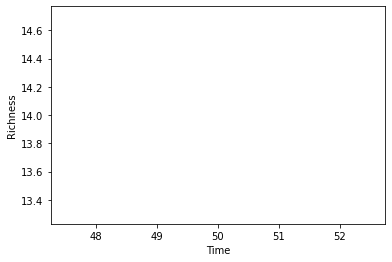

0.014121540387471517


In [5]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

#### 2 assembly, 1 immigration

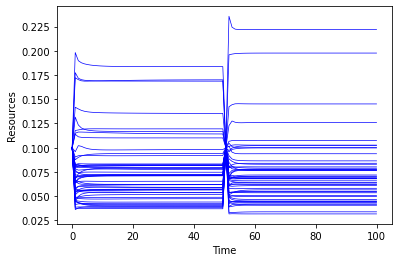

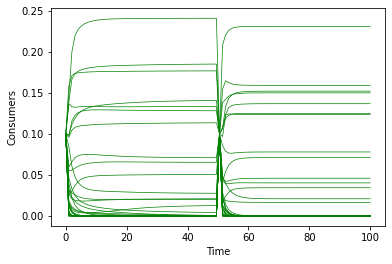

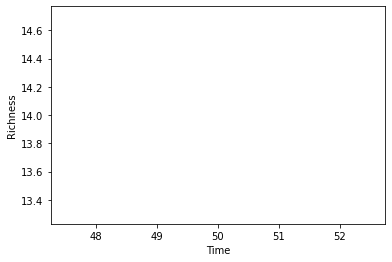

0.01650890111923218


In [6]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 2 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

#### 1 assembly, 2 immigration

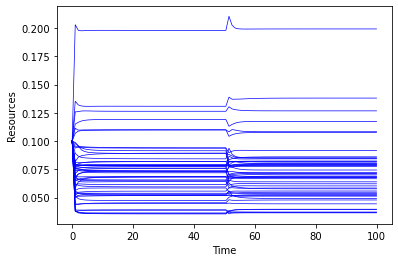

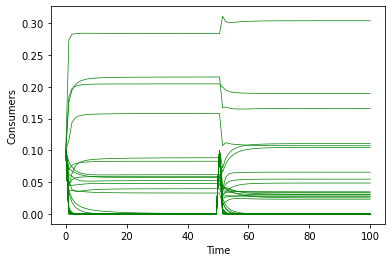

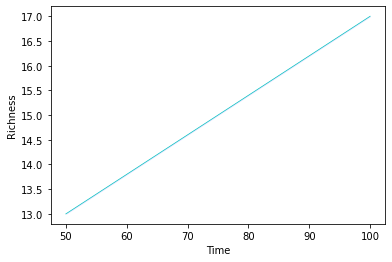

0.014055506388346354


In [7]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 2 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

#### To show the number of resources determines the final richness


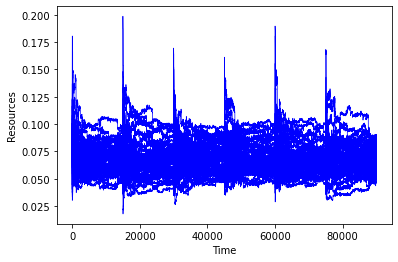

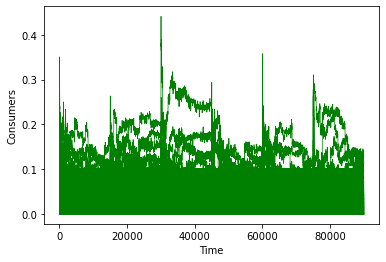

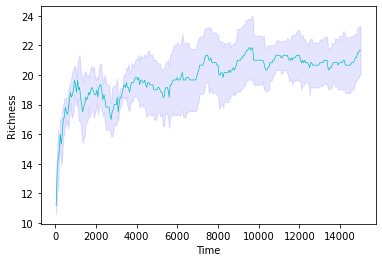

5.035735841592153


In [8]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

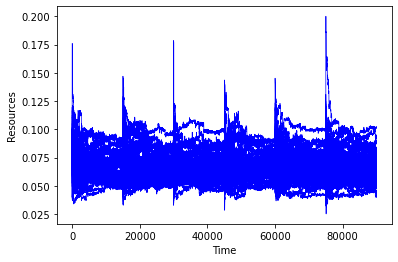

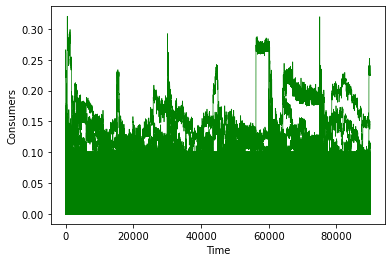

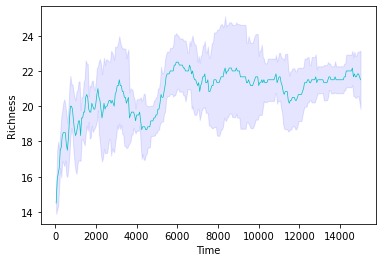

8.311708756287892


In [10]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, x0, Ea_D, Ea_diff, lf, p_value, typ, K)

print((time.time() - start)/60)

#### Richness with Temperature

##### Literature notes
###### A communal catalogue reveals Earth’s multiscale microbial diversity (2017) [1](https://www.nature.com/articles/nature24621): 

Global data. Figure 2b demonstrates a trend of decreasing richness with increasing temperature after 10 &deg;C, however the effects of temperature and pH were not differentiated, given the original data, after subsetting pH values to 6.5-8.0, there are no richness measures after 25 &deg;C. 

###### Temperature mediates continental-scale diversity of microbes in forest soils (2016) [2](https://www.nature.com/articles/ncomms12083?origin=ppub#Abs1): 

The article discusses annual mean temperature in forest soil North America (-10 &deg;C - 20 &deg;C), which is closer to current study. Figure 2 shows an increase of richness with temperature (275 - 300K). 

###### Impact of Warming on Greenhouse Gas Production and Microbial Diversity in Anoxic Peat From a Sphagnum-Dominated Bog (Grand Rapids, Minnesota, United States) (2019) [3](https://www.frontiersin.org/articles/10.3389/fmicb.2019.00870/full):

Anoxic Peat ("an ombrotrophic, nutrient-deficient, acidic, Sphagnum-dominated peat bog (surface pH < 4.0)") methanogenic layer, ex-situ lab experiment, 4 weeks for each temperature. Decreasing richness with increasing temperature (0 - 30 &deg;C, Figure 4). 

##### 35+50,  p = 1, l = 0.1 - 0.9

/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


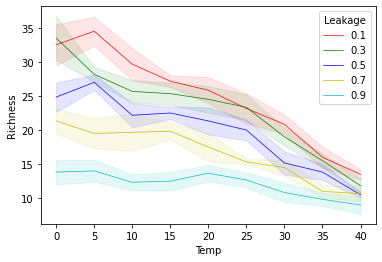

288.529659418265


In [11]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
for i in range(5):
    lf = 0.1+i*0.2 # Leakage
    rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)
    colors = ['r', 'g', 'b', 'y', 'c']
    T_plot = range(0, 5*T_c, 5)
    plt.plot(T_plot, rich_temp_mean, str(colors[i]), linewidth=0.7, label = np.round(lf,1))
    plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color=str(colors[i]), alpha=.1)

plt.legend(title = "Leakage")
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)

##### 35+50, l = 0.4, p = 1 - 100

/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


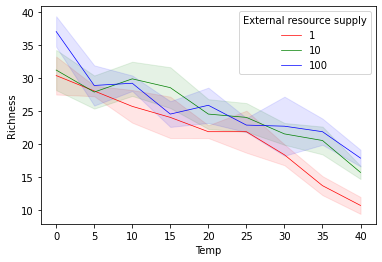

150.11419424215953


In [18]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage


# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
for i in range(3):
    p_value = 10**i # External input resource concentration
    rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)
    colors = ['r', 'g', 'b']
    T_plot = range(0, 5*T_c, 5)
    plt.plot(T_plot, rich_temp_mean, str(colors[i]), linewidth=0.7, label = p_value)
    plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color=str(colors[i]), alpha=.1)

plt.legend(title = "External resource supply")
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


##### Ea_diff = 0.3, 0.6, 0.9

/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


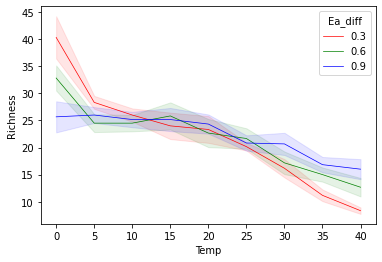

118.62104683319727


In [19]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
for i in range(3):
    Ea_diff = 0.3*(i+1)
    rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)
    colors = ['r', 'g', 'b']
    T_plot = range(0, 5*T_c, 5)
    plt.plot(T_plot, rich_temp_mean, str(colors[i]), linewidth=0.7, label = np.round(Ea_diff,1))
    plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color=str(colors[i]), alpha=.1)

plt.legend(title = "Ea_diff")
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


##### Leakage with respiration Ea, at 25 degrees

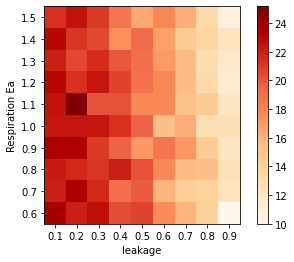

381.7515827258428


In [14]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly number, i.e. how many times the system can assemble
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant

rich_mean = np.empty((0,9))
for i in range(10):
    Ea_diff = 0.1*i
    rich_clct = []
    for j in range(9):
        lf = (j + 1)*0.1 # Leakage
        rich_series = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)[1]
        rich_clct = np.append(rich_clct, np.mean(rich_series[:,tv-1]))
    rich_mean = np.append(rich_mean, [rich_clct], axis = 0)


Xlabel = np.round(np.arange(0.1,1,0.1), 1)
Ylabel = np.round(1.5 - np.arange(0,1,0.1), 1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("leakage")
plt.ylabel("Respiration Ea")
im = plt.imshow(rich_mean, cmap = 'OrRd')
plt.colorbar(im)
plt.title( "" )
plt.show()

print((time.time() - start)/60)

##### Leakage with resource input, at 25 degrees

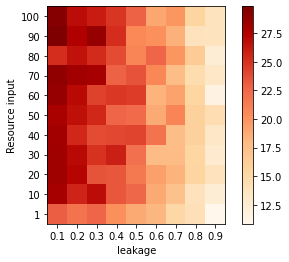

501.8163477261861


In [27]:
##### import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
Ea_diff = 0.6

# Assembly
ass = 6 # Assembly number, i.e. how many times the system can assemble
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant

rich_mean = np.empty((0,9))
for i in range(11):
    p_value = 1 if i==0 else 10*i
    rich_clct = []
    for j in range(9):
        lf = (j + 1)*0.1 # Leakage
        rich_series = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)[1]
        rich_clct = np.append(rich_clct, np.mean(rich_series[:,tv-1]))
    rich_mean = np.append(rich_mean, [rich_clct], axis = 0)


Xlabel = np.round(np.arange(0.1,1,0.1), 1)
Ylabel = np.concatenate((np.round(np.arange(100,0,-10), 1), [1]))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("leakage")
plt.ylabel("Resource input")
im = plt.imshow(np.flip(rich_mean,axis = 0), cmap = 'OrRd')
plt.colorbar(im)
plt.title( "" )
plt.show()

print((time.time() - start)/60)

#####  R to 1

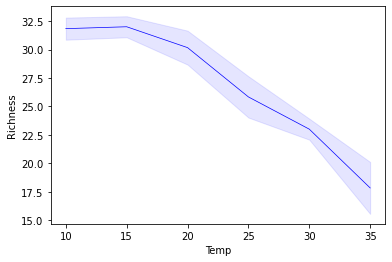

19.21840780178706


In [1]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 6 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)

T_plot = range(10, 10 + 5*T_c, 5)
# T_plot = range(0, 5*T_c, 5)
plt.plot(T_plot, rich_temp_mean, 'b-', linewidth=0.7)
plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color='b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


##### 50+100, l = 0.4, p = 1

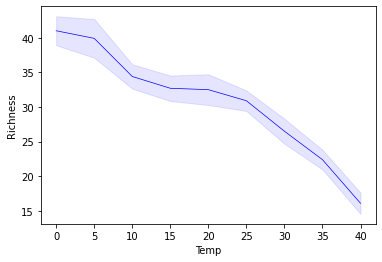

148.03232493400574


In [15]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 100 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 10 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)

T_plot = range(0, 5*T_c, 5)
plt.plot(T_plot, rich_temp_mean, 'b-', linewidth=0.7)
plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color='b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


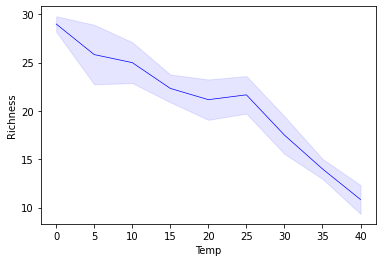

49.233915174007414


In [1]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 35 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 9 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
rich_temp_mean, rich_temp_ci = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, lf, p_value, typ, K)

T_plot = range(0, 5*T_c, 5)
plt.plot(T_plot, rich_temp_mean, 'b-', linewidth=0.7)
plt.fill_between(T_plot, rich_temp_mean - rich_temp_ci, rich_temp_mean + rich_temp_ci, color='b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Temp')
plt.show()

print((time.time() - start)/60)


#### survival with temperature

/home/danica/Documents/CMEEProject/code/comp.py:50: RuntimeWarning: invalid value encountered in true_divide
  sur_rate = np.array(s_sur/s_total).reshape(tv,int(np.ceil(np.max(U_ac_total)/10)))
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/danica/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid val

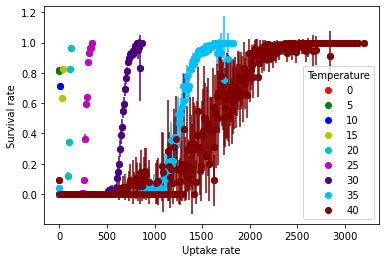

15.04181166489919


In [16]:
import time
start = time.time()

from comp import plot_comp
import numpy as np
import matplotlib.pylab as plt


######## Set up parameters ###########

N = 50 # Number of consumers
M = 100 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
lf = 0.4
p_value = 1 # External input resource concentration

# Assembly
tv = 300 # immigration times inside one assembly
t_fin = 50 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant


########## Running Model ###########
for i in range(9):
    sur_rate_filtered = plot_comp(t_fin, N, M, Tref+5*i, Tref, Ma, tv, Ea_D, lf, p_value, typ, K)

    sur_rate_mean = []
    sur_rate_ci = []
    for j in range(len(sur_rate_filtered)):
        sur_rate_mean.append(np.mean(sur_rate_filtered[j]))
        sur_rate_ci.append(1.96 * np.std(sur_rate_filtered[j],axis = 0)/(len(sur_rate_filtered[j])**0.5))
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'indigo', 'deepskyblue', 'maroon']
    plt.scatter(range(0,len(sur_rate_mean)*10,10),sur_rate_mean, c = colors[i], label = str(5*i))
    plt.errorbar(range(0,len(sur_rate_mean)*10,10),sur_rate_mean, yerr=sur_rate_ci, fmt="o", color= colors[i])

plt.legend(title = "Temperature")
plt.ylabel('Survival rate')
plt.xlabel('Uptake rate')
plt.show()

print((time.time() - start)/60)

#### Survivor CUE with temperature

##### Ea_diff = 0.6

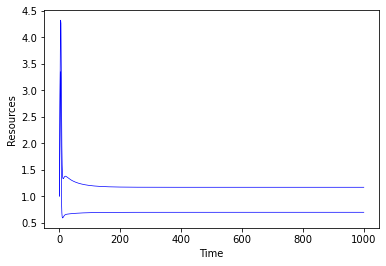

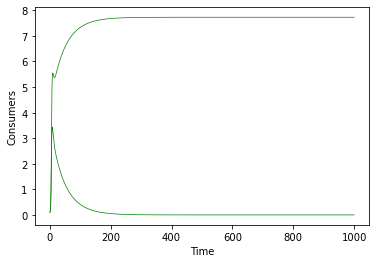

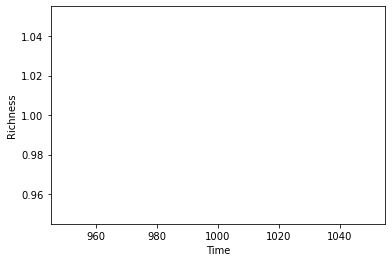

0.008153227965037028


In [22]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 2 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 10 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
U0 = 5
R0 = 1
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 1000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_diff, U0, R0, lf, p_value, typ, K)

print((time.time() - start)/60)

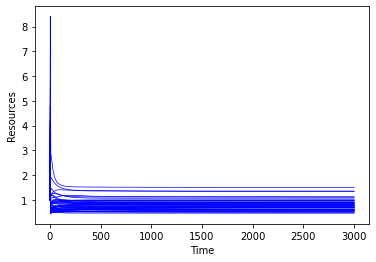

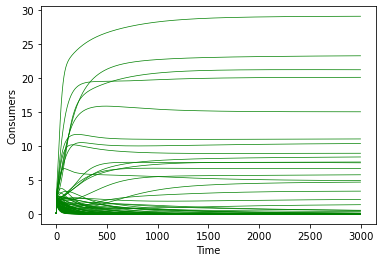

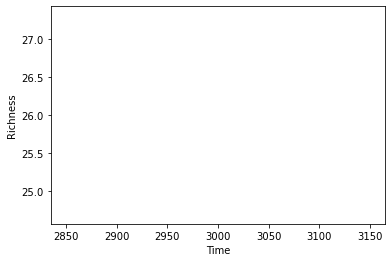

0.06188692649205526


In [24]:
import time
start = time.time()

from plots import plot_con_res_CUE 
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 10 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
U0 = 5
R0 = 1
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 3000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
plot_con_res_CUE(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_diff, U0, R0, lf, p_value, typ, K)

print((time.time() - start)/60)

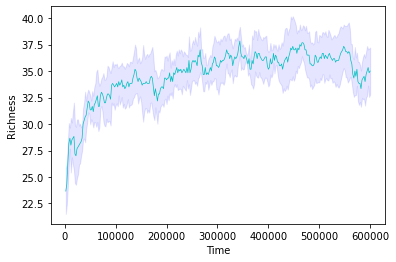

30.10577858686447


In [25]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 10 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
U0 = 5
R0 = 1
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 2000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
rich_series = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_diff, U0, R0, lf, p_value, typ, K)[1]

t_rich = np.linspace(t_fin, tv*t_fin, tv)
rich_mean = np.mean(rich_series, axis = 0)
rich_ci = 1.96 * np.std(rich_series,axis = 0)/(ass**0.5)
plt.plot(t_rich, rich_mean, 'c-', linewidth=0.7)
plt.fill_between(t_rich, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Time')
plt.show()

print((time.time() - start)/60)

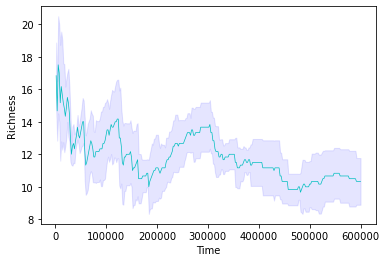

36.874494496981306


In [26]:
import time
start = time.time()

# Temperature params
T = 273.15 + 30 # Temperature

########## Running Model ###########
rich_series = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_diff, U0, R0, lf, p_value, typ, K)[1]

t_rich = np.linspace(t_fin, tv*t_fin, tv)
rich_mean = np.mean(rich_series, axis = 0)
rich_ci = 1.96 * np.std(rich_series,axis = 0)/(ass**0.5)
plt.plot(t_rich, rich_mean, 'c-', linewidth=0.7)
plt.fill_between(t_rich, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Time')
plt.show()

print((time.time() - start)/60)

In [27]:
import time
start = time.time()

from rich_temp import funcs_with_temp
import numpy as np
import matplotlib.pylab as plt


########## Setting Parameters ###########
N = 50 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 10 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_diff = 0.6
U0 = 5 # Setting an universal U0 value for all species
R0 = 1 # Setting an universal R0 value for all species
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 6 # Assembly times at each temperature
tv = 300 # immigration times inside one assembly
t_fin = 2000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

T_c = 6 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
CUE_sur, U_sur, R_sur, rich_out = funcs_with_temp(T_c, t_fin, N, M, Tref, Ma, ass, tv, Ea_D, Ea_diff, U0, R0, lf, p_value, typ, K)

print((time.time() - start)/60)

206.17922337055205


In [29]:
from rich_temp import mean_ci

rich_mean, rich_ci = mean_ci(rich_out, T_c, ass, tv)
CUE_mean, CUE_ci = mean_ci(CUE_sur, T_c, ass, tv)
U_mean, U_ci = mean_ci(U_sur, T_c, ass, tv)
R_mean, R_ci = mean_ci(R_sur, T_c, ass, tv)

print(CUE_mean)

B0_CUE = (U0*(1 - lf) - R0)/U0
Ea_CUE =  (R0 * (Ea_diff))/(U0 * (1 - lf) - R0) 
print(B0_CUE, Ea_CUE)

[0.10879336 0.28990648 0.4003423  0.47001924 0.51520577 0.54375556]
0.4 0.3


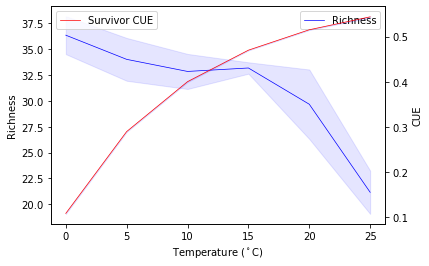

In [78]:
T_plot = range(0, 5*T_c, 5)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(T_plot, rich_mean, 'b-', linewidth=0.7, label = "Richness")
ax1.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
ax2.plot(T_plot, CUE_mean, 'r-', linewidth=0.7, label = "Survivor CUE")
ax2.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='b', alpha=.1)

ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Richness')
ax2.set_ylabel('CUE')
ax1.legend()
ax2.legend()
plt.show()

35.0
0.050375723838806154


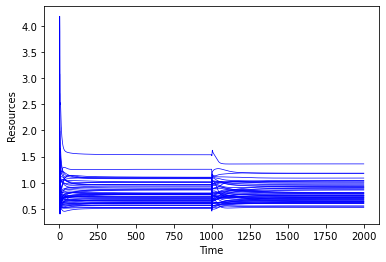

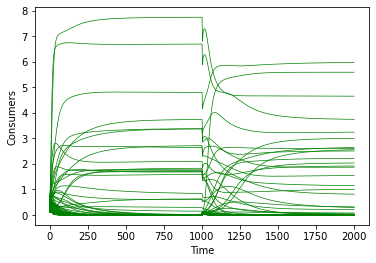

In [9]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
# Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 2 # immigration times inside one assembly
t_fin = 1000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out, Ea_CUE_out, overlap = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, lf, p_value, typ, K)
print(np.mean(rich_series))

print((time.time() - start)/60)

t_plot = np.linspace(0,t_fin*ass*tv,t_fin*ass*tv)

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=0.7)
plt.ylabel('Resources')
plt.xlabel('Time')
# plt.title('Consumer-Resource population dynamics')
plt.show()

plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=0.7)
plt.ylabel('Consumers')
plt.xlabel('Time')
plt.show()

#### No invasion

- Using beta distribution for Ea_U (median = 0.82, $\alpha$ = 15). [ref](https://www.nature.com/articles/s41467-019-13109-1)
- Using the same base uptake temperature response curve through all changes. (B_U = 2 when T = 0)
- Tied Ea_R and B_R with Ea_CUE and B0_CUE values (B0_CUE = 0.1 when T = 0). 

(array([1.4600e+02, 2.2270e+03, 9.2670e+03, 1.5542e+04, 1.3360e+04,
        6.7590e+03, 2.1520e+03, 4.6400e+02, 7.9000e+01, 4.0000e+00]),
 array([0.22408796, 0.37822202, 0.53235607, 0.68649013, 0.84062418,
        0.99475824, 1.14889229, 1.30302635, 1.4571604 , 1.61129446,
        1.76542851]),
 <a list of 10 Patch objects>)

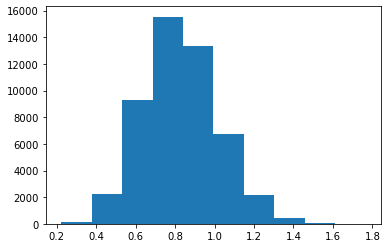

In [1]:
import numpy as np
import matplotlib.pylab as plt

a = 15
Ea_U = np.random.beta(a, ((a - 1/3) / (0.82/4)) + 2/3 - a, 50000)*4

plt.hist(Ea_U)

In [2]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 10 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 5000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_CUE, lf, p_value, typ, K)
print(np.mean(rich_series))

print((time.time() - start)/60)

22.9
1.0041129151980082


In [3]:
rich = np.array([len(np.where(result_array[i,0:N])[0]) for i in range(len(result_array))]).reshape(ass,t_fin)
rich_mean = np.mean(rich, axis = 0)
rich_ci = 1.96 * np.std(rich,axis = 0)/(ass**0.5)

rich

array([[100, 100, 100, ...,  20,  20,  20],
       [100, 100, 100, ...,  23,  23,  23],
       [100, 100, 100, ...,  23,  23,  23],
       ...,
       [100, 100, 100, ...,  21,  21,  21],
       [100, 100, 100, ...,  28,  28,  28],
       [100, 100, 100, ...,  18,  18,  18]])

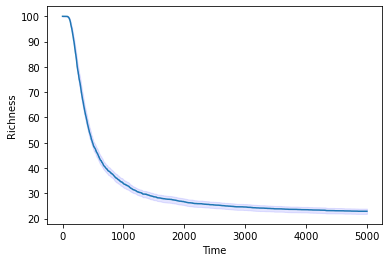

In [4]:
t_plot = np.linspace(0,t_fin,t_fin)

plt.plot(t_plot, rich_mean)
plt.fill_between(t_plot, rich_mean - rich_ci, rich_mean + rich_ci, color = 'b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Time')
plt.show()

In [5]:
sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
CUE_sur = np.array([np.mean(CUE_out[i][sur[i]]) for i in range(len(sur))])
CUE_sur

array([0.08110162, 0.07991351, 0.08288819, 0.08009943, 0.0777439 ,
       0.08048621, 0.08259097, 0.08097586, 0.07853124, 0.0799697 ,
       0.08184562, 0.08049092, 0.08093159, 0.08135862, 0.08159236,
       0.07946403, 0.08098438, 0.08116123, 0.08016252, 0.08119064,
       0.07927648, 0.08007373, 0.07898603, 0.0800793 , 0.08111316,
       0.08112217, 0.08385905, 0.07875012, 0.08157796, 0.07989432])

In [6]:
U_sur = np.array([np.mean(np.sum(U_out_total, axis = 1).reshape(ass, N)[i][sur[i]]) for i in range(len(sur))])
U_sur

array([1.96828221, 2.09163063, 2.00913816, 1.94756496, 2.05778553,
       1.98923125, 1.92156555, 2.21523999, 2.17085145, 1.93255167,
       2.0834968 , 1.90770704, 2.06869766, 1.8735116 , 1.8048244 ,
       1.93815289, 2.09134548, 2.08468636, 1.96084024, 2.25653434,
       1.96513198, 1.83161476, 2.19852682, 1.8011256 , 2.04366577,
       1.9778281 , 2.11579922, 1.89755373, 1.97504976, 1.97781646])

In [7]:
R_sur = np.array([np.mean(R_out[i][sur[i]]) for i in range(len(sur))])
R_sur

array([1.02285911, 1.08695972, 1.04409071, 1.0120929 , 1.06937137,
       1.03374576, 0.99858174, 1.15119585, 1.12812837, 1.00429095,
       1.08273273, 0.99137989, 1.07504201, 0.97360957, 0.93791483,
       1.00720179, 1.08681146, 1.08335101, 1.01899173, 1.17265532,
       1.02122195, 0.95183696, 1.14251048, 0.93599259, 1.06203383,
       1.02781979, 1.09951937, 0.98610352, 1.02637609, 1.02781374])

##### Ea_CUE = 0.3

In [8]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 6 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
rich = np.empty((0, ass))
all_CUE = []
sU = []
sR = []
all_U = np.empty((0, ass))
all_R = np.empty((0, ass))

for i in range(T_c):
    T = 273.15 + 5 * i # Temperature
    result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_CUE, lf, p_value, typ, K)
    rich = np.append(rich, [rich_series.flatten()], axis = 0)
    sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
    all_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    sU.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i][sur[i]] for i in range(len(sur))]).ravel())
    sR.append(np.concatenate([R_out[i][sur[i]] for i in range(len(sur))]).ravel())
    all_U = np.append(all_U, [np.mean(np.sum(U_out_total, axis = 1).reshape(ass,N), axis = 1)], axis = 0)
    all_R = np.append(all_R, [np.mean(R_out,axis = 1)], axis = 0)   

print((time.time() - start)/60)

5.199741725126902


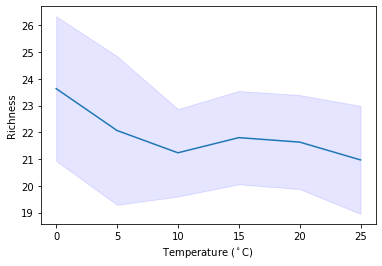

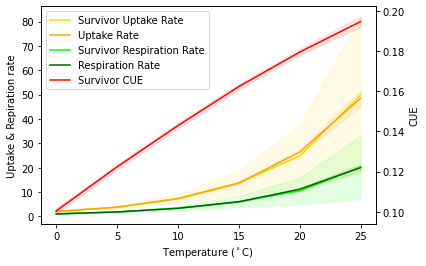

In [9]:
rich_mean = np.mean(rich, axis = 1)
rich_ci =  1.96 * np.std(rich,axis = 1)/(T_c**0.5)
CUE_mean = np.array([np.mean(all_CUE[i]) for i in range(T_c)])
CUE_ci = np.array([1.96 * np.std(all_CUE[i])/(T_c**0.5) for i in range(T_c)])

sU_mean = np.array([np.mean(sU[i]) for i in range(T_c)])
sU_ci = np.array([1.96 * np.std(sU[i])/(T_c**0.5) for i in range(T_c)])
sR_mean = np.array([np.mean(sR[i]) for i in range(T_c)])
sR_ci = np.array([1.96 * np.std(sR[i])/(T_c**0.5) for i in range(T_c)])

U_mean = np.mean(all_U, axis = 1)
U_ci = 1.96 * np.std(all_U,axis = 1)/(T_c**0.5)
R_mean = np.mean(all_R, axis = 1)
R_ci = 1.96 * np.std(all_R,axis = 1)/(T_c**0.5)

T_plot = range(0, 5*T_c, 5)

plt.plot(T_plot, rich_mean)
plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Richness')
plt. show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(T_plot, sU_mean,'gold', label = "Survivor Uptake Rate")
ax1.fill_between(T_plot, sU_mean - sU_ci, sU_mean + sU_ci, color='gold', alpha=.1)
ln2 = ax1.plot(T_plot, U_mean,'orange', label = "Uptake Rate")
ax1.fill_between(T_plot, U_mean - U_ci, U_mean + U_ci, color='orange', alpha=.1)

ln3 = ax1.plot(T_plot, sR_mean, 'lime', label = "Survivor Respiration Rate")
ax1.fill_between(T_plot, sR_mean - sR_ci, sR_mean + sR_ci, color='lime', alpha=.1)
ln4 = ax1.plot(T_plot, R_mean, 'darkgreen', label = "Respiration Rate")
ax1.fill_between(T_plot, R_mean - R_ci, R_mean + R_ci, color='darkgreen', alpha=.1)

ln5 = ax2.plot(T_plot, CUE_mean, 'r', label = "Survivor CUE")
ax2.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake & Repiration rate')
ax2.set_ylabel('CUE')

lns = ln1+ln2+ln3+ln4+ln5
ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
plt. show()

##### Ea_CUE =  0

In [2]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_CUE = 0
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 6 # How many temperatures to cover (how many cycles to run)

########## Running Model ###########
rich = np.empty((0, ass))
all_CUE = []
sU = []
sR = []
all_U = np.empty((0, ass))
all_R = np.empty((0, ass))

for i in range(T_c):
    T = 273.15 + 5 * i # Temperature
    result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_CUE, lf, p_value, typ, K)
    rich = np.append(rich, [rich_series.flatten()], axis = 0)
    sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
    all_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    sU.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i][sur[i]] for i in range(len(sur))]).ravel())
    sR.append(np.concatenate([R_out[i][sur[i]] for i in range(len(sur))]).ravel())
    all_U = np.append(all_U, [np.mean(np.sum(U_out_total, axis = 1).reshape(ass,N), axis = 1)], axis = 0)
    all_R = np.append(all_R, [np.mean(R_out,axis = 1)], axis = 0)   

print((time.time() - start)/60)

5.167007791996002


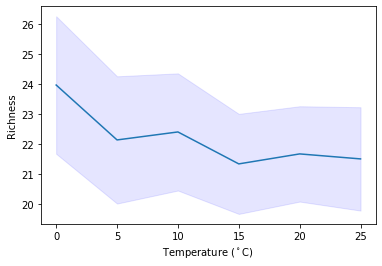

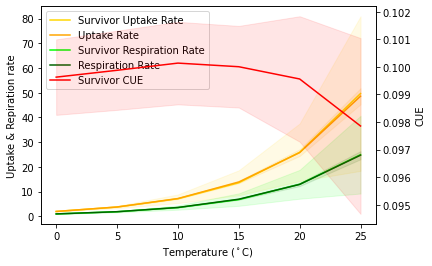

In [3]:
rich_mean = np.mean(rich, axis = 1)
rich_ci =  1.96 * np.std(rich,axis = 1)/(T_c**0.5)
CUE_mean = np.array([np.mean(all_CUE[i]) for i in range(T_c)])
CUE_ci = np.array([1.96 * np.std(all_CUE[i])/(T_c**0.5) for i in range(T_c)])

sU_mean = np.array([np.mean(sU[i]) for i in range(T_c)])
sU_ci = np.array([1.96 * np.std(sU[i])/(T_c**0.5) for i in range(T_c)])
sR_mean = np.array([np.mean(sR[i]) for i in range(T_c)])
sR_ci = np.array([1.96 * np.std(sR[i])/(T_c**0.5) for i in range(T_c)])

U_mean = np.mean(all_U, axis = 1)
U_ci = 1.96 * np.std(all_U,axis = 1)/(T_c**0.5)
R_mean = np.mean(all_R, axis = 1)
R_ci = 1.96 * np.std(all_R,axis = 1)/(T_c**0.5)

T_plot = range(0, 5*T_c, 5)

plt.plot(T_plot, rich_mean)
plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Richness')
plt. show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(T_plot, sU_mean,'gold', label = "Survivor Uptake Rate")
ax1.fill_between(T_plot, sU_mean - sU_ci, sU_mean + sU_ci, color='gold', alpha=.1)
ln2 = ax1.plot(T_plot, U_mean,'orange', label = "Uptake Rate")
ax1.fill_between(T_plot, U_mean - U_ci, U_mean + U_ci, color='orange', alpha=.1)

ln3 = ax1.plot(T_plot, sR_mean, 'lime', label = "Survivor Respiration Rate")
ax1.fill_between(T_plot, sR_mean - sR_ci, sR_mean + sR_ci, color='lime', alpha=.1)
ln4 = ax1.plot(T_plot, R_mean, 'darkgreen', label = "Respiration Rate")
ax1.fill_between(T_plot, R_mean - R_ci, R_mean + R_ci, color='darkgreen', alpha=.1)

ln5 = ax2.plot(T_plot, CUE_mean, 'r', label = "Survivor CUE")
ax2.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake & Repiration rate')
ax2.set_ylabel('CUE')

lns = ln1+ln2+ln3+ln4+ln5
ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
plt. show()

##### Ea_CUE =  -0.3

In [10]:
import time
start = time.time()

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Ea_CUE = -0.3

########## Running Model ###########
rich = np.empty((0, ass))
all_CUE = []
sU = []
sR = []
all_U = np.empty((0, ass))
all_R = np.empty((0, ass))

for i in range(T_c):
    T = 273.15 + 5 * i # Temperature
    result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_CUE, lf, p_value, typ, K)
    rich = np.append(rich, [rich_series.flatten()], axis = 0)
    sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
    all_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    sU.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i][sur[i]] for i in range(len(sur))]).ravel())
    sR.append(np.concatenate([R_out[i][sur[i]] for i in range(len(sur))]).ravel())
    all_U = np.append(all_U, [np.mean(np.sum(U_out_total, axis = 1).reshape(ass,N), axis = 1)], axis = 0)
    all_R = np.append(all_R, [np.mean(R_out,axis = 1)], axis = 0)
    
print((time.time() - start)/60)

/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


5.230288604895274


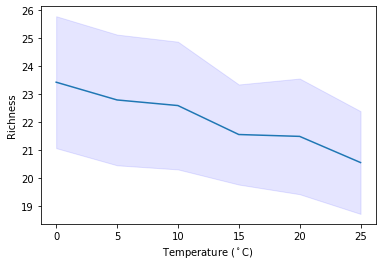

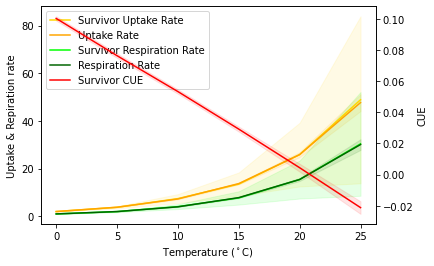

In [11]:
rich_mean = np.mean(rich, axis = 1)
rich_ci =  1.96 * np.std(rich,axis = 1)/(T_c**0.5)
CUE_mean = np.array([np.mean(all_CUE[i]) for i in range(T_c)])
CUE_ci = np.array([1.96 * np.std(all_CUE[i])/(T_c**0.5) for i in range(T_c)])

sU_mean = np.array([np.mean(sU[i]) for i in range(T_c)])
sU_ci = np.array([1.96 * np.std(sU[i])/(T_c**0.5) for i in range(T_c)])
sR_mean = np.array([np.mean(sR[i]) for i in range(T_c)])
sR_ci = np.array([1.96 * np.std(sR[i])/(T_c**0.5) for i in range(T_c)])

U_mean = np.mean(all_U, axis = 1)
U_ci = 1.96 * np.std(all_U,axis = 1)/(T_c**0.5)
R_mean = np.mean(all_R, axis = 1)
R_ci = 1.96 * np.std(all_R,axis = 1)/(T_c**0.5)

T_plot = range(0, 5*T_c, 5)

plt.plot(T_plot, rich_mean)
plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Richness')
plt. show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(T_plot, sU_mean,'gold', label = "Survivor Uptake Rate")
ax1.fill_between(T_plot, sU_mean - sU_ci, sU_mean + sU_ci, color='gold', alpha=.1)
ln2 = ax1.plot(T_plot, U_mean,'orange', label = "Uptake Rate")
ax1.fill_between(T_plot, U_mean - U_ci, U_mean + U_ci, color='orange', alpha=.1)

ln3 = ax1.plot(T_plot, sR_mean, 'lime', label = "Survivor Respiration Rate")
ax1.fill_between(T_plot, sR_mean - sR_ci, sR_mean + sR_ci, color='lime', alpha=.1)
ln4 = ax1.plot(T_plot, R_mean, 'darkgreen', label = "Respiration Rate")
ax1.fill_between(T_plot, R_mean - R_ci, R_mean + R_ci, color='darkgreen', alpha=.1)

ln5 = ax2.plot(T_plot, CUE_mean, 'r', label = "Survivor CUE")
ax2.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake & Repiration rate')
ax2.set_ylabel('CUE')

lns = ln1+ln2+ln3+ln4+ln5
ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
plt. show()

##### Testing the Ea_CUE values

In [6]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 50 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 7 # How many temperatures to cover (how many cycles to run)

rich_mean = np.empty((0,7))
CUE_mean = np.empty((0,7))
for i in np.round(np.arange(-0.3,0.4, 0.1),2):
    Ea_CUE = i
    rich = np.empty((0, ass))
    all_CUE = []
    for j in range(T_c):
        T = 273.15 + 5 * j # Temperature
        result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_CUE, lf, p_value, typ, K)
        sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
        rich = np.append(rich, [rich_series.flatten()], axis = 0)
        all_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    rich_mean = np.append(rich_mean, [np.mean(rich, axis = 1)], axis = 0)
    CUE_mean = np.append(CUE_mean, [np.array([np.mean(all_CUE[i]) for i in range(T_c)])], axis = 0)
    
print((time.time() - start)/60)

85.9141077597936


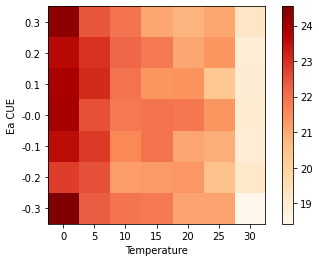

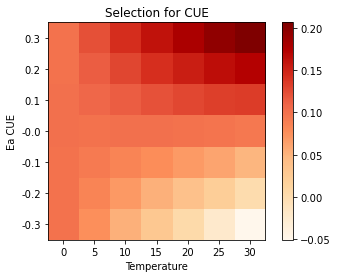

In [7]:
Xlabel = np.round(np.arange(0, 6 * T_c, 5), 1)
Ylabel = np.round(np.arange(0.3,-0.4, -0.1),1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("Temperature")
plt.ylabel("Ea CUE")
im = plt.imshow(np.flip(rich_mean,axis = 0), cmap = 'OrRd')
plt.colorbar(im)
plt.title( "" )
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("Temperature")
plt.ylabel("Ea CUE")
im = plt.imshow(np.flip(CUE_mean,axis = 0), cmap = 'OrRd')
plt.colorbar(im)
plt.title( "Selection for CUE" )
plt.show()

##### Testing reference temperatures

In [8]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 50 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 7 # How many temperatures to cover (how many cycles to run)

rich_mean = np.empty((0,7))
for i in range(T_c):
    Tref = 273.15 + 5 * i
    rich = np.empty((0,ass))
    for j in range(T_c):
        T = 273.15 + 5 * j # Temperature
        result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, Ea_CUE, lf, p_value, typ, K)
        rich = np.append(rich, [rich_series.flatten()], axis = 0)
    rich_mean = np.append(rich_mean, [np.mean(rich, axis = 1)], axis = 0)
    
print((time.time() - start)/60)

68.61414670944214


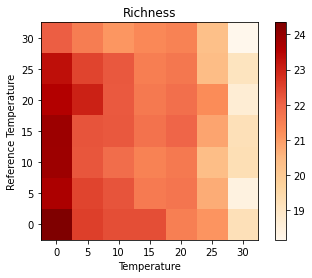

In [9]:
Xlabel = np.round(np.arange(0, 5 * T_c, 5), 1)
Ylabel = np.round(np.arange(30, -5, -5),1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("Temperature")
plt.ylabel("Reference Temperature")
im = plt.imshow(np.flip(rich_mean,axis = 0), cmap = 'OrRd')
plt.colorbar(im)
plt.title( "Richness" )
plt.show()

##### Broken the relationship between Uptake, Respiration and CUE

- Using different beta distribution for Ea_U (median = 0.82, $\alpha$ = 15) and Ea_R (median = 0.67, $\alpha$ = 15).  [ref](https://www.nature.com/articles/s41467-019-13109-1)
- Broken the relationship between uptake and respiration, setting B_U = 2 and B_R = 1 at T = 0 for base temperature response curves.
- Checking the selection of Ea_CUE values across temperatures.
- Testing whether the position of B0 values have an impact on richness. 

In [1]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out, Ea_CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, lf, p_value, typ, K)
print(np.mean(rich_series))

print((time.time() - start)/60)

25.566666666666666
0.9368729432423909


In [2]:
rich = np.array([len(np.where(result_array[i,0:N])[0]) for i in range(len(result_array))]).reshape(ass,t_fin)
rich_mean = np.mean(rich, axis = 0)
rich_ci = 1.96 * np.std(rich,axis = 0)/(ass**0.5)

rich

array([[100, 100, 100, ...,  24,  24,  24],
       [100, 100, 100, ...,  30,  30,  30],
       [100, 100, 100, ...,  23,  23,  23],
       ...,
       [100, 100, 100, ...,  25,  25,  25],
       [100, 100, 100, ...,  25,  25,  25],
       [100, 100, 100, ...,  27,  27,  27]])

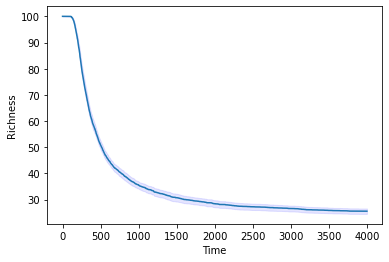

In [3]:
t_plot = np.linspace(0,t_fin,t_fin)

plt.plot(t_plot, rich_mean)
plt.fill_between(t_plot, rich_mean - rich_ci, rich_mean + rich_ci, color = 'b', alpha=.1)
plt.ylabel('Richness')
plt.xlabel('Time')
plt.show()

###### Tref = 0

In [1]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 6 # How many temperatures to cover (how many cycles to run)

rich = np.empty((0, ass))
all_CUE = []
all_Ea = []
sU = []
sR = []
all_U = np.empty((0, ass))
all_R = np.empty((0, ass))

for i in range(T_c):
    T = 273.15 + 5 * i # Temperature
    result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out, Ea_CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, lf, p_value, typ, K)
    rich = np.append(rich, [rich_series.flatten()], axis = 0)
    sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
    all_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    all_Ea.append(np.concatenate([Ea_CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    sU.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i][sur[i]] for i in range(len(sur))]).ravel())
    sR.append(np.concatenate([R_out[i][sur[i]] for i in range(len(sur))]).ravel())
    all_U = np.append(all_U, [np.mean(np.sum(U_out_total, axis = 1).reshape(ass,N), axis = 1)], axis = 0)
    all_R = np.append(all_R, [np.mean(R_out,axis = 1)], axis = 0)

print((time.time() - start)/60)

4.770778648058573


In [2]:
rich_mean = np.mean(rich, axis = 1)
rich_ci =  1.96 * np.std(rich,axis = 1)/(T_c**0.5)

CUE_mean = np.array([np.mean(all_CUE[i]) for i in range(T_c)])
CUE_ci = np.array([1.96 * np.std(all_CUE[i])/(T_c**0.5) for i in range(T_c)])
Ea_mean = np.array([np.mean(all_Ea[i]) for i in range(T_c)])
Ea_ci = np.array([1.96 * np.std(all_Ea[i])/(T_c**0.5) for i in range(T_c)])

sU_mean = np.array([np.mean(sU[i]) for i in range(T_c)])
sU_ci = np.array([1.96 * np.std(sU[i])/(T_c**0.5) for i in range(T_c)])
sR_mean = np.array([np.mean(sR[i]) for i in range(T_c)])
sR_ci = np.array([1.96 * np.std(sR[i])/(T_c**0.5) for i in range(T_c)])

U_mean = np.mean(all_U, axis = 1)
U_ci = 1.96 * np.std(all_U,axis = 1)/(T_c**0.5)
R_mean = np.mean(all_R, axis = 1)
R_ci = 1.96 * np.std(all_R,axis = 1)/(T_c**0.5)

In [3]:
Ea_mean

array([0.84738863, 2.7009554 , 3.18769501, 3.18335963, 3.32996852,
       3.33458887])

In [4]:
sR_mean

array([0.99999997, 1.52843239, 2.22342337, 3.33845175, 4.69811577,
       6.49136567])

In [5]:
R_mean

array([ 0.99999997,  1.68921383,  2.84457686,  4.75790149,  8.08145937,
       13.27243049])

In [8]:
R_ci

array([1.26394128e-08, 1.71868023e-02, 5.16531682e-02, 1.36057071e-01,
       3.16732892e-01, 6.00096789e-01])

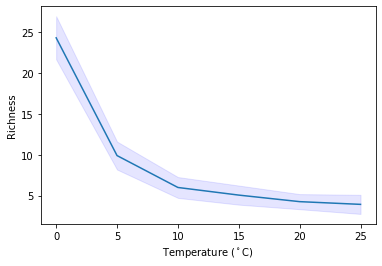

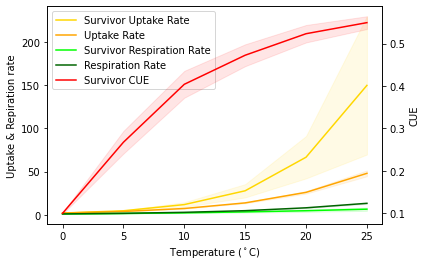

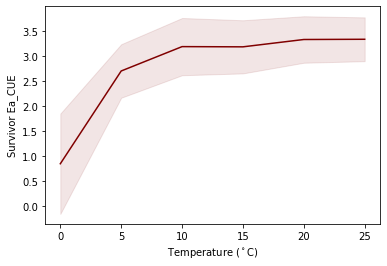

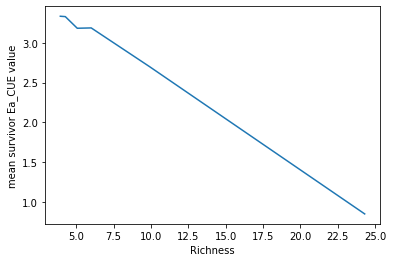

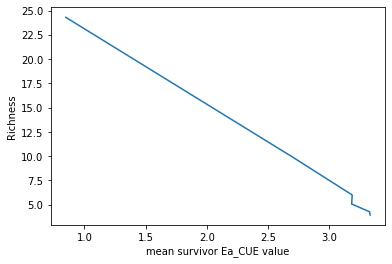

In [6]:
T_plot = range(0, 5*T_c, 5)

plt.plot(T_plot, rich_mean)
plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Richness')
plt. show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(T_plot, sU_mean,'gold', label = "Survivor Uptake Rate")
ax1.fill_between(T_plot, sU_mean - sU_ci, sU_mean + sU_ci, color='gold', alpha=.1)
ln2 = ax1.plot(T_plot, U_mean,'orange', label = "Uptake Rate")
ax1.fill_between(T_plot, U_mean - U_ci, U_mean + U_ci, color='orange', alpha=.1)

ln3 = ax1.plot(T_plot, sR_mean, 'lime', label = "Survivor Respiration Rate")
ax1.fill_between(T_plot, sR_mean - sR_ci, sR_mean + sR_ci, color='lime', alpha=.1)
ln4 = ax1.plot(T_plot, R_mean, 'darkgreen', label = "Respiration Rate")
ax1.fill_between(T_plot, R_mean - R_ci, R_mean + R_ci, color='darkgreen', alpha=.1)

ln5 = ax2.plot(T_plot, CUE_mean, 'r', label = "Survivor CUE")
ax2.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake & Repiration rate')
ax2.set_ylabel('CUE')

lns = ln1+ln2+ln3+ln4+ln5
ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
plt. show()

plt.plot(T_plot, Ea_mean, color = 'maroon')
plt.fill_between(T_plot, Ea_mean - Ea_ci, Ea_mean + Ea_ci, color='maroon', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Survivor Ea_CUE')
plt. show()

plt.plot(rich_mean, Ea_mean)
plt.xlabel('Richness')
plt.ylabel('mean survivor Ea_CUE value')
plt.show()

plt.plot(Ea_mean,rich_mean)
plt.xlabel('mean survivor Ea_CUE value')
plt.ylabel('Richness')
plt.show()

###### Tref = 10

In [10]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 10 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 7 # How many temperatures to cover (how many cycles to run)

rich = np.empty((0, ass))
all_CUE = []
all_Ea = []
all_U = []
all_R = []

for i in range(T_c):
    T = 273.15 + 5 * i # Temperature
    result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out, Ea_CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, lf, p_value, typ, K)
    rich = np.append(rich, [rich_series.flatten()], axis = 0)
    sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
    all_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    all_Ea.append(np.concatenate([Ea_CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    all_U.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i][sur[i]] for i in range(len(sur))]).ravel())
    all_R.append(np.concatenate([R_out[i][sur[i]] for i in range(len(sur))]).ravel())

print((time.time() - start)/60)

5.31726013024648


In [11]:
rich_mean = np.mean(rich, axis = 1)
rich_ci =  1.96 * np.std(rich,axis = 1)/(T_c**0.5)
CUE_mean = np.array([np.mean(all_CUE[i]) for i in range(T_c)])
CUE_ci = np.array([1.96 * np.std(all_CUE[i])/(T_c**0.5) for i in range(T_c)])
Ea_mean = np.array([np.mean(all_Ea[i]) for i in range(T_c)])
Ea_ci = np.array([1.96 * np.std(all_Ea[i])/(T_c**0.5) for i in range(T_c)])
U_mean = np.array([np.mean(all_U[i]) for i in range(T_c)])
U_ci = np.array([1.96 * np.std(all_U[i])/(T_c**0.5) for i in range(T_c)])
R_mean = np.array([np.mean(all_R[i]) for i in range(T_c)])
R_ci = np.array([1.96 * np.std(all_R[i])/(T_c**0.5) for i in range(T_c)])

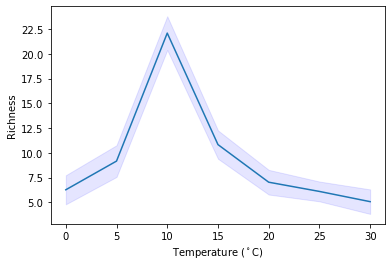

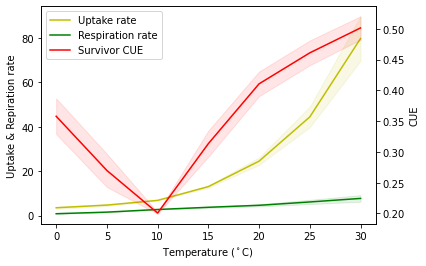

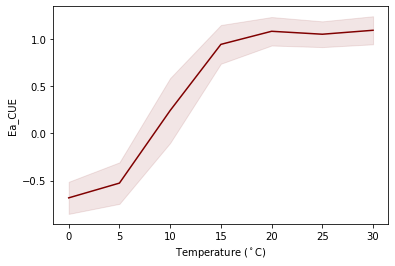

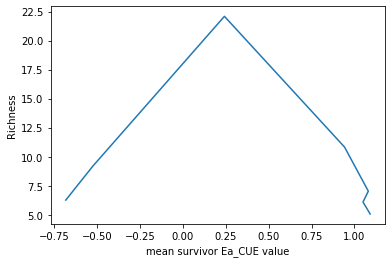

In [12]:
T_plot = range(0, 5*T_c, 5)

plt.plot(T_plot, rich_mean)
plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Richness')
plt. show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(T_plot, U_mean,'y', label = "Uptake rate")
ax1.fill_between(T_plot, U_mean - U_ci, U_mean + U_ci, color='y', alpha=.1)
ln2 = ax1.plot(T_plot, R_mean, 'g', label = "Respiration rate")
ax1.fill_between(T_plot, R_mean - R_ci, R_mean + R_ci, color='g', alpha=.1)
ln3 = ax2.plot(T_plot, CUE_mean, 'r', label = "Survivor CUE")
ax2.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake & Repiration rate')
ax2.set_ylabel('CUE')
lns = ln1+ln2+ln3
ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
plt. show()

plt.plot(T_plot, Ea_mean, color = 'maroon')
plt.fill_between(T_plot, Ea_mean - Ea_ci, Ea_mean + Ea_ci, color='maroon', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Ea_CUE')
plt. show()


plt.plot(Ea_mean,rich_mean)
plt.xlabel('mean survivor Ea_CUE value')
plt.ylabel('Richness')
plt.show()

###### Testing on different Tref values

In [2]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 7 # How many temperatures to cover (how many cycles to run)

rich_mean = np.empty((0,7))
Ea_mean = np.empty((0,7))
for i in range(T_c):
    Tref = 273.15 + 5 * i
    all_Ea = []
    rich = np.empty((0,ass))
    for j in range(T_c):
        T = 273.15 + 5 * j # Temperature
        result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out, Ea_CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, lf, p_value, typ, K)
        rich = np.append(rich, [rich_series.flatten()], axis = 0)
        sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
        all_Ea.append(np.concatenate([Ea_CUE_out[i][sur[i]] for i in range(len(sur))]).ravel())
    Ea_mean = np.append(Ea_mean, [np.array([np.mean(all_Ea[i]) for i in range(T_c)])], axis = 0)
    rich_mean = np.append(rich_mean, [np.mean(rich, axis = 1)], axis = 0)
    
print((time.time() - start)/60)

37.1930522163709


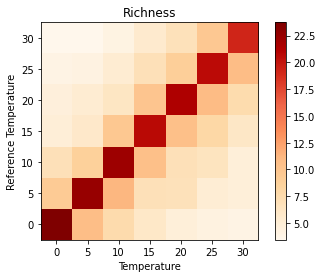

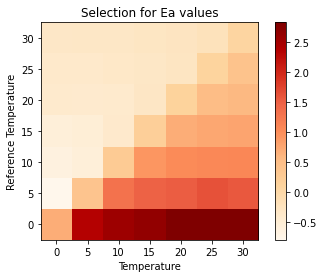

In [3]:
Xlabel = np.round(np.arange(0, 5 * T_c, 5), 1)
Ylabel = np.round(np.arange(30, -5, -5),1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("Temperature")
plt.ylabel("Reference Temperature")
im = plt.imshow(np.flip(rich_mean,axis = 0), cmap = 'OrRd')
plt.colorbar(im)
plt.title( "Richness" )
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yticks(range(len(Ylabel)))
ax.set_xticks(range(len(Xlabel)))
ax.set_yticklabels(Ylabel)
ax.set_xticklabels(Xlabel)
plt.xlabel("Temperature")
plt.ylabel("Reference Temperature")
im = plt.imshow(np.flip(Ea_mean,axis = 0), cmap = 'OrRd')
plt.colorbar(im)
plt.title( "Selection for Ea values" )
plt.show()

###### 1+1

In [5]:
from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 30 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 15 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out, Ea_CUE_out = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, lf, p_value, typ, K)
print(np.mean(rich_series))

1.0


In [6]:
1/R_out

array([[0.05004746]])

In [7]:
result_array

array([[0.1      , 1.       ],
       [0.0439997, 0.1942941],
       [0.0505518, 0.2153879],
       [0.0500025, 0.2130832],
       [0.0500514, 0.2133077],
       [0.0500471, 0.2132857],
       [0.0500475, 0.2132879],
       [0.0500475, 0.2132876],
       [0.0500475, 0.2132876],
       [0.0500475, 0.2132876],
       [0.0500475, 0.2132876],
       [0.0500475, 0.2132876],
       [0.0500475, 0.2132876],
       [0.0500475, 0.2132876],
       [0.0500475, 0.2132876]])

###### Example on fighting over 1 resource

At 0 degree: 

In [2]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 10 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
print(np.mean(rich_series))

print((time.time() - start)/60)

2.0
0.000322115421295166


In [3]:
print(result_array[:,0:N])
S0 = R_out/(np.sum(U_out_total, axis = 1) * (1 - lf))
print(S0)

[[0.1       0.1      ]
 [0.3012146 0.3012146]
 [0.4445369 0.4445369]
 [0.4665954 0.4665954]
 [0.466877  0.466877 ]
 [0.4660406 0.4660406]
 [0.4657168 0.4657168]
 [0.4656312 0.4656312]
 [0.4656128 0.4656128]
 [0.4656096 0.4656096]]
[[0.63385533 0.63385533]]


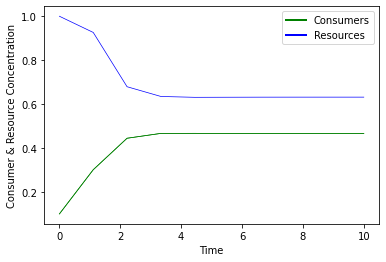

In [5]:
from matplotlib.lines import Line2D

rich = np.array([len(np.where(result_array[i,0:N])[0]) for i in range(len(result_array))]).reshape(ass,t_fin)
rich_mean = np.mean(rich, axis = 0)
rich_ci = 1.96 * np.std(rich,axis = 0)/(ass**0.5)

t_plot = np.linspace(0,len(result_array),len(result_array))

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=0.7, label = "Resources")
plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=0.7, label = "Consumers")
plt.ylabel('Consumer & Resource Concentration')
plt.xlabel('Time')
# plt.title('Consumer-Resource Concentration Dynamics')
plt.legend([Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='blue', lw=2)], ['Consumers', 'Resources'])
plt.show()

Starting biomass as 0.1 & 0.2:

In [6]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 10 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
print(np.mean(rich_series))

print((time.time() - start)/60)

2.0
0.0002572178840637207


In [7]:
print(result_array[:,0:N])
S0 = R_out/(np.sum(U_out_total, axis = 1) * (1 - lf))
print(S0)

[[0.1       0.2      ]
 [0.2359853 0.4719705]
 [0.3011027 0.6022052]
 [0.3107239 0.6214474]
 [0.3110462 0.622092 ]
 [0.3107573 0.6215141]
 [0.310636  0.6212714]
 [0.3106029 0.6212051]
 [0.3105957 0.6211906]
 [0.3105944 0.6211879]]
[[0.6338554  0.63385544]]


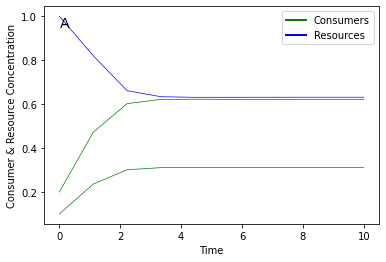

In [8]:
from matplotlib.lines import Line2D

rich = np.array([len(np.where(result_array[i,0:N])[0]) for i in range(len(result_array))]).reshape(ass,t_fin)
rich_mean = np.mean(rich, axis = 0)
rich_ci = 1.96 * np.std(rich,axis = 0)/(ass**0.5)

t_plot = np.linspace(0,len(result_array),len(result_array))

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=0.7, label = "Resources")
plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=0.7, label = "Consumers")
plt.ylabel('Consumer & Resource Concentration')
plt.xlabel('Time')
# plt.title('Consumer-Resource Concentration Dynamics')
plt.legend([Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='blue', lw=2)], ['Consumers', 'Resources'])
plt.text(0,0.95,'A',fontsize= 'x-large')
plt.show()

At 25 degrees: 

In [6]:
# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
t_fin = 10

########## Running Model ###########
result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
print(np.mean(rich_series))

1.0


In [7]:
print(result_array[:,0:N])
S0 = R_out/(np.sum(U_out_total, axis = 1) * (1 - lf))
print(S0)

[[ 0.1        0.1      ]
 [ 0.         0.5239512]
 [ 0.         0.5317665]
 [ 0.         0.5317175]
 [ 0.         0.5317172]
 [-0.         0.5317172]
 [-0.         0.5317172]
 [-0.         0.5317172]
 [-0.         0.5317172]
 [-0.         0.5317172]]
[[1.14963743 0.2076812 ]]


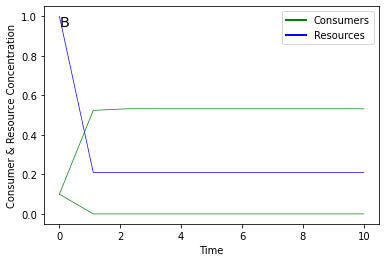

In [8]:
from matplotlib.lines import Line2D

rich = np.array([len(np.where(result_array[i,0:N])[0]) for i in range(len(result_array))]).reshape(ass,t_fin)
rich_mean = np.mean(rich, axis = 0)
rich_ci = 1.96 * np.std(rich,axis = 0)/(ass**0.5)

t_plot = np.linspace(0,len(result_array),len(result_array))

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=0.7, label = "Resources")
plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=0.7, label = "Consumers")
plt.ylabel('Consumer & Resource Concentration')
plt.xlabel('Time')
# plt.title('Consumer Resource Concentration Dynamics')
plt.legend([Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='blue', lw=2)], ['Consumers', 'Resources'])
plt.text(0,0.95,'B',fontsize= 'x-large')
plt.show()

#### The model

30.0
0.02888015111287435


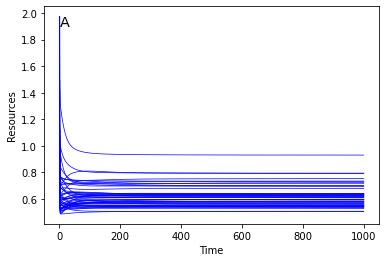

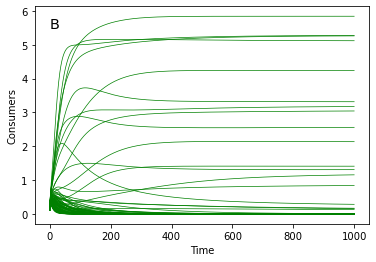

In [20]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
# Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 1000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
np.random.seed(1)
result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
print(np.mean(rich_series))

print((time.time() - start)/60)

t_plot = np.linspace(0,t_fin,t_fin)

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=0.7)
plt.ylabel('Resources')
plt.xlabel('Time')
# plt.title('Consumer-Resource population dynamics')
plt.text(0,1.9,'A',fontsize= 'x-large')
plt.show()

plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=0.7)
plt.ylabel('Consumers')
plt.xlabel('Time')
plt.text(0,5.5,'B',fontsize= 'x-large')
plt.show()

33.0
0.04757480223973592


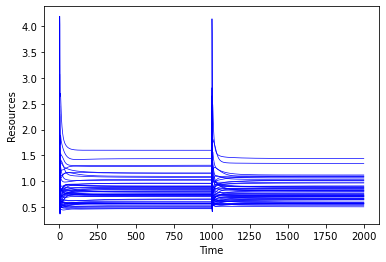

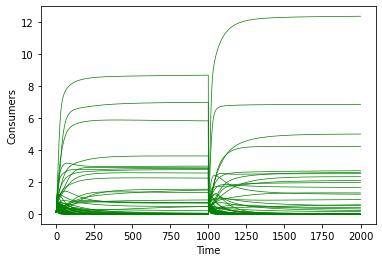

In [11]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
# Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 2 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 1000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
result_array, rich_series, l, U_out_total, U_ac_total, R_out, CUE_out, Ea_CUE_out, overlap = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, tv, Ea_D, lf, p_value, typ, K)
print(np.mean(rich_series))

print((time.time() - start)/60)

t_plot = np.linspace(0,t_fin*ass,t_fin*ass)

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=0.7)
plt.ylabel('Resources')
plt.xlabel('Time')
# plt.title('Consumer-Resource population dynamics')
plt.show()

plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=0.7)
plt.ylabel('Consumers')
plt.xlabel('Time')
plt.show()

In [1]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 26 # How many temperatures to cover (how many cycles to run)

rich = np.empty((0, ass))
sU = []
sR = []
all_U = np.empty((0, ass))
all_R = np.empty((0, ass))
sur_CUE = []
sur_Ea = []
ext_CUE = []
ext_Ea = []
sur_overlap = []
ext_overlap = []
sur_crossf = []
ext_crossf = []


for i in range(T_c):
    T = 273.15 + i # Temperature
    result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
    rich = np.append(rich, [rich_series.flatten()], axis = 0)
    
    sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
    ext = [np.where(result_array[(i+1)*t_fin-1, 0:N] == 0) for i in range(ass)]
    
    sU.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i][sur[i]] for i in range(len(sur))]).ravel())
    sR.append(np.concatenate([R_out[i][sur[i]] for i in range(len(sur))]).ravel())
    all_U = np.append(all_U, [np.mean(np.sum(U_out_total, axis = 1).reshape(ass,N), axis = 1)], axis = 0)
    all_R = np.append(all_R, [np.mean(R_out,axis = 1)], axis = 0)
    
    sur_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]))
    sur_Ea.append(np.concatenate([Ea_CUE_out[i][sur[i]] for i in range(len(sur))]))
    ext_CUE.append(np.concatenate([CUE_out[i][ext[i]] for i in range(len(sur))]))
    ext_Ea.append(np.concatenate([Ea_CUE_out[i][ext[i]] for i in range(len(sur))]))
    
    sur_overlap.append(np.concatenate([overlap[i][sur[i]] for i in range(len(sur))]))
    ext_overlap.append(np.concatenate([overlap[i][ext[i]] for i in range(len(ext))]))
    
    sur_crossf.append(np.concatenate([crossf[i][sur[i]] for i in range(len(sur))]))
    ext_crossf.append(np.concatenate([crossf[i][ext[i]] for i in range(len(ext))]))
    
print((time.time() - start)/60)

24.478238050142924


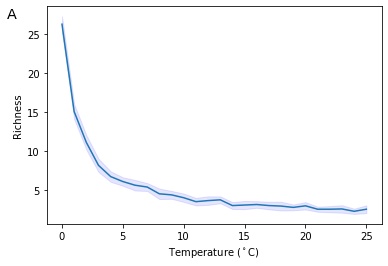

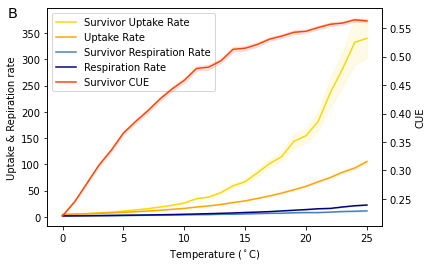

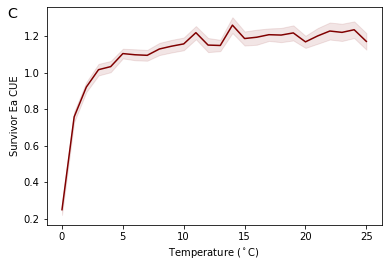

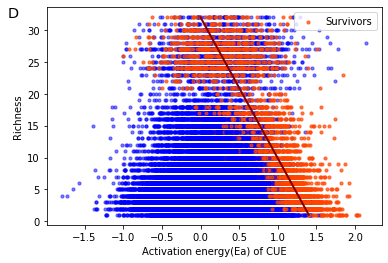

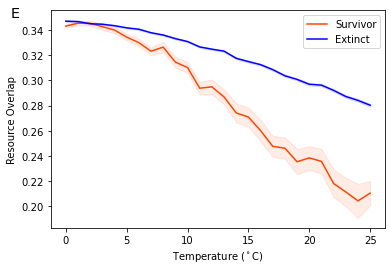

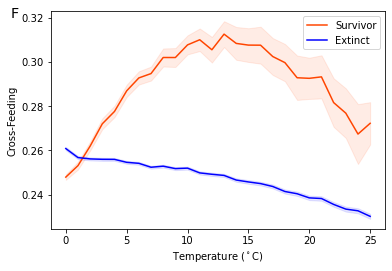

In [31]:
rich_mean = np.mean(rich, axis = 1)
rich_ci =  1.96 * np.std(rich,axis = 1)/(T_c**0.5)

CUE_mean = np.array([np.mean(sur_CUE[i]) for i in range(T_c)])
CUE_ci = np.array([1.96 * np.std(sur_CUE[i])/(len(sur_CUE[i])**0.5) for i in range(T_c)])
Ea_mean = np.array([np.mean(sur_Ea[i]) for i in range(T_c)])
Ea_ci = np.array([1.96 * np.std(sur_Ea[i])/(len(sur_Ea[i])**0.5) for i in range(T_c)])

sU_mean = np.array([np.mean(sU[i]) for i in range(T_c)])
sU_ci = np.array([1.96 * np.std(sU[i])/(len(sU[i])**0.5) for i in range(T_c)])
sR_mean = np.array([np.mean(sR[i]) for i in range(T_c)])
sR_ci = np.array([1.96 * np.std(sR[i])/(len(sR[i])**0.5) for i in range(T_c)])

U_mean = np.mean(all_U, axis = 1)
U_ci = 1.96 * np.std(all_U,axis = 1)/(ass**0.5)
R_mean = np.mean(all_R, axis = 1)
R_ci = 1.96 * np.std(all_R,axis = 1)/(ass**0.5)

rich_sur = [[np.repeat(rich[i][j], rich[i][j]) for j in range(ass)] for i in range(T_c)]
rich_ext = [[np.repeat(rich[i][j], N - rich[i][j]) for j in range(ass)] for i in range(T_c)]

overlap_sur_mean = np.array([np.mean(sur_overlap[i]) for i in range(T_c)])
overlap_sur_ci = np.array([1.96 * np.std(sur_overlap[i])/(len(sur_overlap[i])**0.5) for i in range(T_c)])
overlap_ext_mean = np.array([np.mean(ext_overlap[i]) for i in range(T_c)])
overlap_ext_ci = np.array([1.96 * np.std(ext_overlap[i])/(len(ext_overlap[i])**0.5) for i in range(T_c)])

crossf_sur_mean = np.array([np.mean(sur_crossf[i]) for i in range(T_c)])
crossf_sur_ci = np.array([1.96 * np.std(sur_overlap[i])/(len(sur_overlap[i])**0.5) for i in range(T_c)])
crossf_ext_mean = np.array([np.mean(ext_crossf[i]) for i in range(T_c)])
crossf_ext_ci = np.array([1.96 * np.std(ext_overlap[i])/(len(ext_overlap[i])**0.5) for i in range(T_c)])

Ea = []
for i in range(T_c): 
    n = 0
    for j in rich[i]:
        j = int(j)
        Ea.append(sur_Ea[i][n:n+j])
        n = n + j

A = list(zip(rich.flatten(),Ea))
A.sort(key = lambda x: x[0])

rich_v = []
for x in rich.flatten():
    if x not in rich_v:
        rich_v.append(x)
rich_v = np.sort(rich_v)


Ea_sorted = []
for i in rich_v:
    sorting = np.empty((0))
    for j in range(len(A)):
        if [x[0] for x in A][j] == i:
            sorting = np.append(sorting, A[j][1])
    Ea_sorted.append(sorting)

    
meanEa = []
for i in range(len(Ea_sorted)):
    meanEa.append(np.mean(Ea_sorted[i]))
    


T_plot = range(0, T_c, 1)
T_sur = [[np.repeat(T_plot[i], rich[i][j]) for j in range(ass)] for i in range(T_c)]

plt.plot(T_plot, rich_mean)
plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color = 'b', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Richness')
plt.text(-4.5,27,'A',fontsize= 'x-large')
plt. show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(T_plot, sU_mean,'gold', label = "Survivor Uptake Rate")
ax1.fill_between(T_plot, sU_mean - sU_ci, sU_mean + sU_ci, color='gold', alpha=.1)
ln2 = ax1.plot(T_plot, U_mean,'orange', label = "Uptake Rate")
ax1.fill_between(T_plot, U_mean - U_ci, U_mean + U_ci, color='orange', alpha=.1)

ln3 = ax1.plot(T_plot, sR_mean, 'steelblue', label = "Survivor Respiration Rate")
ax1.fill_between(T_plot, sR_mean - sR_ci, sR_mean + sR_ci, color='steelblue', alpha=.1)
ln4 = ax1.plot(T_plot, R_mean, 'navy', label = "Respiration Rate")
ax1.fill_between(T_plot, R_mean - R_ci, R_mean + R_ci, color='navy', alpha=.1)

ln5 = ax2.plot(T_plot, CUE_mean, 'orangered', label = "Survivor CUE")
ax2.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake & Repiration rate')
ax2.set_ylabel('CUE')

lns = ln1+ln2+ln3+ln4+ln5
ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
ax1.text(-4.5,380,'B',fontsize= 'x-large')
plt. show()

plt.plot(T_plot, Ea_mean, color = 'maroon')
plt.fill_between(T_plot, Ea_mean - Ea_ci, Ea_mean + Ea_ci, color='maroon', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Survivor Ea CUE')
plt.text(-4.5,1.3,'C',fontsize= 'x-large')
plt. show()


n = 0
for i in range(T_c):
    plt.scatter(ext_Ea[i], np.concatenate(rich_ext[i]), color = 'b', alpha = 0.5, s = 10)
    if n == 0: 
        plt.scatter(sur_Ea[i], np.concatenate(rich_sur[i]), color = 'orangered', alpha = 0.7, s = 10, label = 'Survivors')
        n = 1
    else:
        plt.scatter(sur_Ea[i], np.concatenate(rich_sur[i]), color = 'orangered', alpha = 0.7, s = 10)

m, b = np.polyfit(meanEa, rich_v, 1)
x = np.arange(0, 1.5, 0.1)
plt.plot(x, m*x + b, color = 'maroon',linewidth=2)
plt.xlabel('Activation energy(Ea) of CUE')
plt.ylabel('Richness')
plt.legend(loc = 1)
plt.text(-2.5,32,'D',fontsize= 'x-large')
plt.show()


plt.plot(T_plot, overlap_sur_mean, color = 'orangered', label = 'Survivor')
plt.plot(T_plot, overlap_ext_mean, color = 'b', label = 'Extinct')
plt.fill_between(T_plot, overlap_sur_mean - overlap_sur_ci, overlap_sur_mean + overlap_sur_ci, color = 'orangered', alpha=.1)
plt.fill_between(T_plot, overlap_ext_mean - overlap_ext_ci, overlap_ext_mean + overlap_ext_ci, color = 'b', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Resource Overlap')
plt.legend()
plt.text(-4.5,0.35,'E',fontsize= 'x-large')
plt.show()

plt.plot(T_plot, crossf_sur_mean, color = 'orangered', label = 'Survivor')
plt.plot(T_plot, crossf_ext_mean, color = 'b', label = 'Extinct')
plt.fill_between(T_plot, crossf_sur_mean - crossf_sur_ci, crossf_sur_mean + crossf_sur_ci, color = 'orangered', alpha=.1)
plt.fill_between(T_plot, crossf_ext_mean - crossf_ext_ci, crossf_ext_mean + crossf_ext_ci, color = 'b', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Cross-Feeding')
plt.legend()
plt.text(-4.5,0.32,'F',fontsize= 'x-large')

plt.show()

### Type 2

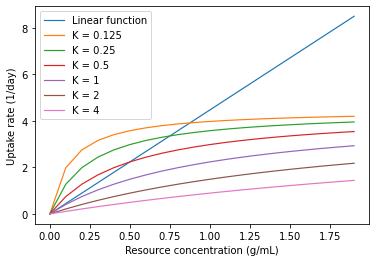

In [64]:
import matplotlib.pylab as plt
x = np.arange(0, 2, 0.1)
plt.plot(x, 4.47*x, linewidth = 1.2, label = 'Linear function')
for i in range(6):
    K = 2**(i - 3) # Half saturation constant for Monod equation(Type II)
    plt.plot(x, 4.47*x/(K+x), linewidth = 1.2, label = 'K = %s' %K)
plt.legend()
plt.ylabel('Uptake rate (1/day)')
plt.xlabel('Resource concentration (g/mL)')
plt.show()

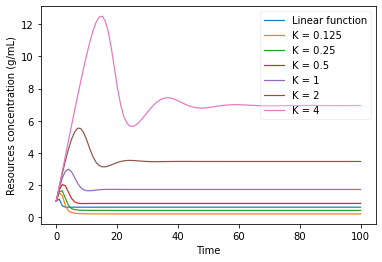

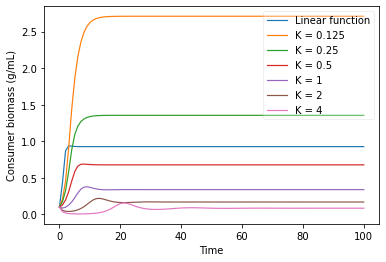

In [69]:
from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 0 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
# Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 100 # Number of time steps for each temperature

########## Running Model ###########

t_plot = np.linspace(0,t_fin,t_fin)

typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant for Monod equation(Type II)
np.random.seed(0)
result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
plt.plot(t_plot, result_array[:,N:N+M], linewidth= 1.2, label = 'Linear function')
typ = 2 # Functional response, Type I or II
for i in range(6):
    K = 2**(i - 3) # Half saturation constant for Monod equation(Type II)
    np.random.seed(0)
    result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
    plt.plot(t_plot, result_array[:,N:N+M], linewidth= 1.2, label = 'K = %s' %K)
plt.legend(framealpha = 0.3, loc = 1)
plt.ylabel('Resources concentration (g/mL)')
plt.xlabel('Time')
plt.show()

typ = 1 # Functional response, Type I or II
K = 1 # Half saturation constant for Monod equation(Type II)
np.random.seed(0)
result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
plt.plot(t_plot, result_array[:,0:N], linewidth= 1.2, label = 'Linear function')
typ = 2 # Functional response, Type I or II
for i in range(6):
    K = 2**(i - 3) # Half saturation constant for Monod equation(Type II)
    np.random.seed(0)
    result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K)
    plt.plot(t_plot, result_array[:,0:N], linewidth= 1.2, label = 'K = %s' %K)
plt.legend(framealpha = 0.3, loc = 1)
plt.ylabel('Consumer biomass (g/mL)')
plt.xlabel('Time')
plt.show()


/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/danica/anaconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


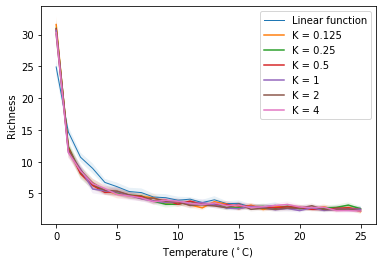

176.26539151271183


In [1]:
import time
start = time.time()

from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C !!!
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 30 # Assembly times at each temperature
tv = 1 # immigration times inside one assembly
t_fin = 4000 # Number of time steps for each temperature
T_c = 26 # How many temperatures to cover (how many cycles to run)

# Invasion
inv = False
sp = 0 # number of invading species, with higher than maximum CUE


T_plot = range(0, T_c, 1)

typ = 1 # Functional response, Type I or II
K = 0
rich = np.empty((0, ass))
for i in range(T_c):
    T = 273.15 + i # Temperature
    result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf, invasion_result, inv_U, inv_R = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, inv, sp)
    rich = np.append(rich, [rich_series.flatten()], axis = 0)

rich_mean = np.mean(rich, axis = 1)
rich_ci =  1.96 * np.std(rich,axis = 1)/(ass**0.5)
plt.plot(T_plot, rich_mean, linewidth= 1, label = 'Linear function')
plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, alpha=.1)


typ = 2 # Functional response, Type I or II
for j in range(6):
    K = 2**(j - 3) # Half saturation constant for Monod equation(Type II)
    rich = np.empty((0, ass))

    for i in range(T_c):
        T = 273.15 + i # Temperature
        result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf, invasion_result, inv_U, inv_R = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, inv, sp)
        rich = np.append(rich, [rich_series.flatten()], axis = 0)

    rich_mean = np.mean(rich, axis = 1)
    rich_ci =  1.96 * np.std(rich,axis = 1)/(ass**0.5)
    plt.plot(T_plot, rich_mean, label = 'K = %s' %K)
    plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, alpha=.1)

plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Richness')
plt.legend()
plt.show()
    
print((time.time() - start)/60)

## Invasion

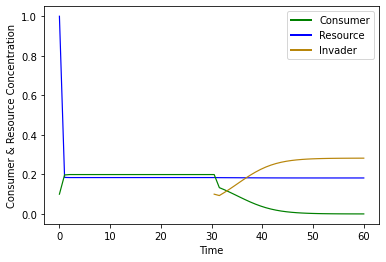

In [2]:
from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
from matplotlib.lines import Line2D
import numpy as np


N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly number, i.e. how many times the system can assemble
t_fin = 30 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant

# Invasion
inv = True
sp = 1 # number of invading species, with higher than maximum CUE

np.random.seed(0)
result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf, invasion_result, inv_U, inv_R = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, inv, sp)

t_plot = np.linspace(0, t_fin*2, t_fin*2)

res = np.append(result_array[:,N:N+M], invasion_result[:,N+sp:N+sp+M],axis = 0)
con = np.append(result_array[:,0:N], invasion_result[:,0:N], axis = 0)
plt.plot(t_plot, res, 'b-', linewidth=1.2, label = "Resource")
plt.plot(t_plot, con, 'g-', linewidth=1.2, label = "Consumer")
plt.plot(t_plot[t_fin:t_fin*2], invasion_result[:,N:N+sp], color = 'darkgoldenrod', linewidth=1.2, label = "Invader")


plt.ylabel('Consumer & Resource Concentration')
plt.xlabel('Time')
# plt.title('Consumer-Resource Concentration Dynamics')
plt.legend([Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='darkgoldenrod', lw=2)], ['Consumer', 'Resource','Invader'])
plt.show()

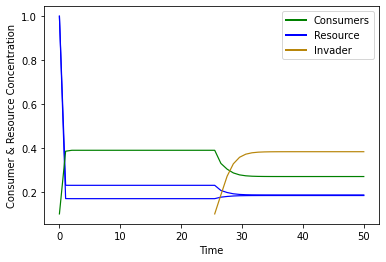

In [3]:
from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
from matplotlib.lines import Line2D
import numpy as np


N = 1 # Number of consumers
M = 2 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin, 10 degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
Ea_CUE = 0.3
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# Assembly
ass = 1 # Assembly number, i.e. how many times the system can assemble
t_fin = 25 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant

# Invasion
inv = True
sp = 1 # number of invading species, with higher than maximum CUE

np.random.seed(0)
result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf, invasion_result, inv_U, inv_R = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, inv, sp)

t_plot = np.linspace(0, t_fin*2, t_fin*2)

res = np.append(result_array[:,N:N+M], invasion_result[:,N+sp:N+sp+M],axis = 0)
con = np.append(result_array[:,0:N], invasion_result[:,0:N], axis = 0)
plt.plot(t_plot, res, 'b-', linewidth=1.2, label = "Resource")
plt.plot(t_plot, con, 'g-', linewidth=1.2, label = "Consumer")
plt.plot(t_plot[t_fin:t_fin*2], invasion_result[:,N:N+sp], color = 'darkgoldenrod', linewidth=1.2, label = "Invader")


plt.ylabel('Consumer & Resource Concentration')
plt.xlabel('Time')
# plt.title('Consumer-Resource Concentration Dynamics')
plt.legend([Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='darkgoldenrod', lw=2)], ['Consumers', 'Resource','Invader'])
plt.show()